# Project Title : Telco-Customer-Churn Prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. gender
2. customerID
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. DeviceProtection
10. TechSupport
11. StreamingTV
12. StreamingMovies
13. PaperlessBilling
14. TotalCharges
## Ordinal :
15. Contract


## DISCRETE: 
16. SeniorCitizen

## Continuoue
17. MonthlyCharges
18. TotalCharges

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [12]:
import xgboost as xgb

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
import seaborn as sns

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
import pickle

In [18]:
from sklearn import svm

In [19]:
import pandas as pd

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
df=pd.read_csv('Telco-Customer-Churn.csv')


In [22]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [23]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='gender', ylabel='count'>

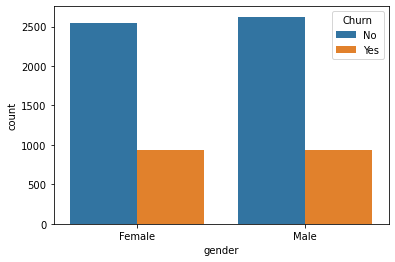

In [26]:
sns.countplot(x='gender',data=df,hue='Churn')

In [27]:
label_df=df.groupby(["gender","Churn"]).size().sort_values().index

In [28]:
val_df=df.groupby(["gender","Churn"]).size().sort_values().values

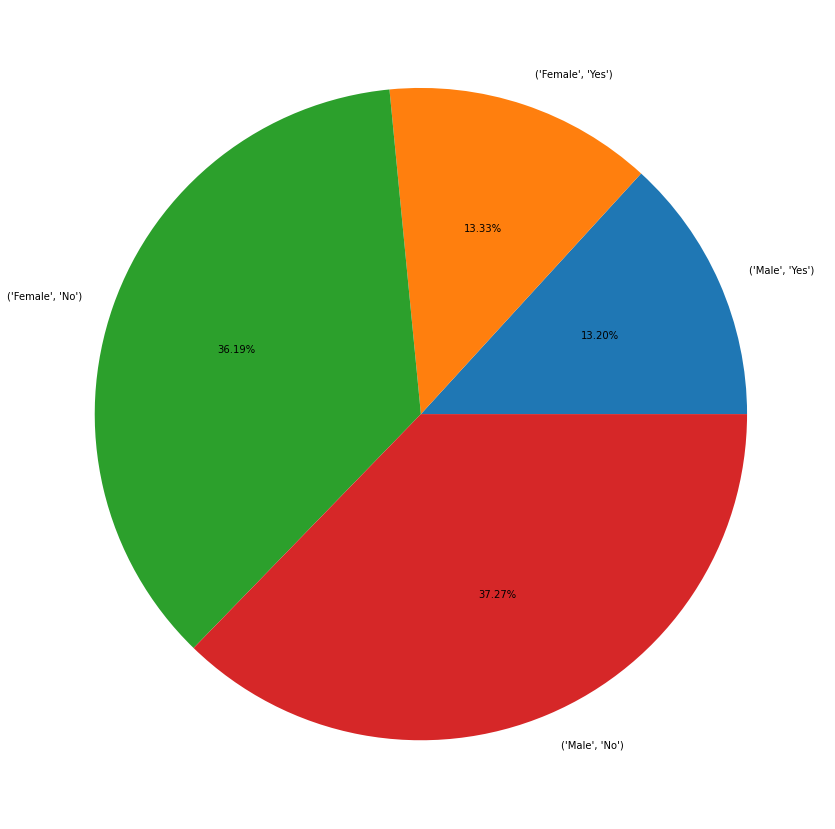

In [29]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Male customers do less churn as compare to Female customers 
2. Female customers do more churn as comapred to Female customers

In [30]:
df.groupby(["gender","Churn"]).size()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

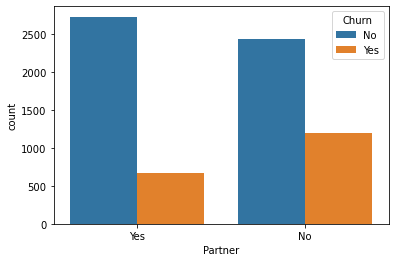

In [31]:
sns.countplot(x='Partner',hue='Churn',data=df)

In [32]:
label_df=df.groupby(["Partner","Churn"]).size().sort_values().index

In [33]:
val_df=df.groupby(["Partner","Churn"]).size().sort_values().values

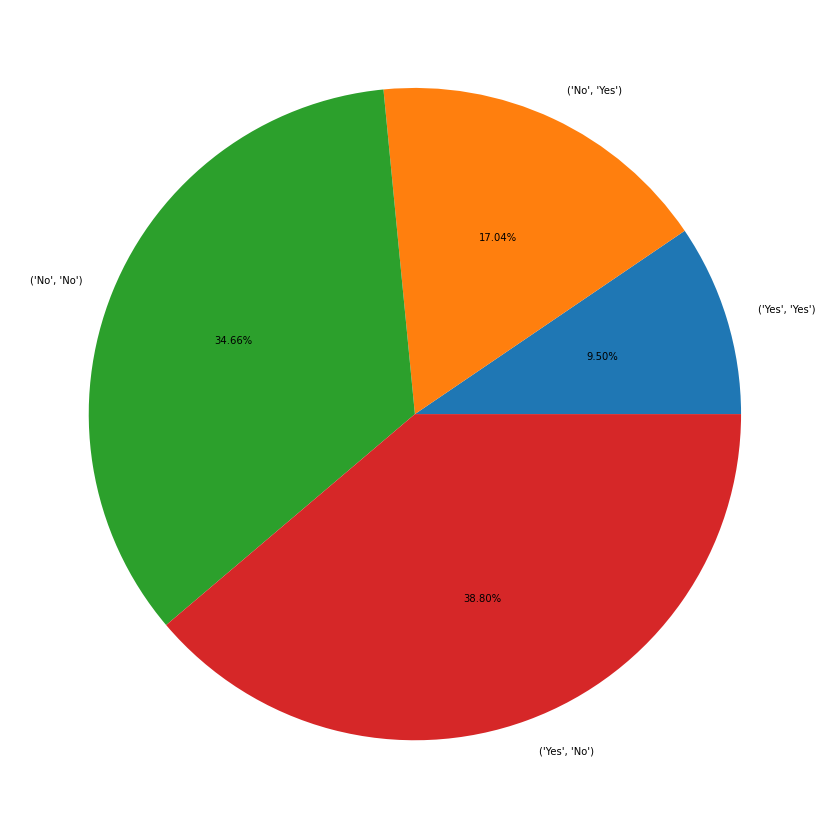

In [34]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having partner do minimum churn.
2. Customers having no partner do maximum churn.

In [35]:
df.groupby("Partner")['Churn'].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

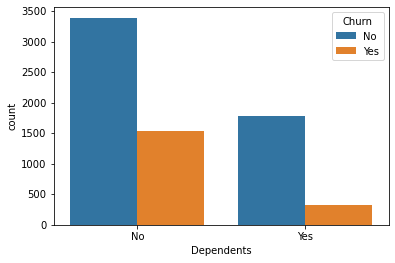

In [36]:
sns.countplot(x=df['Dependents'],hue=df['Churn'])

In [37]:
df.groupby(["Dependents","Churn"]).size()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64

In [38]:
label_df=df.groupby(["Dependents","Churn"]).size().sort_values().index

In [39]:
val_df=df.groupby(["Dependents","Churn"]).size().sort_values().values

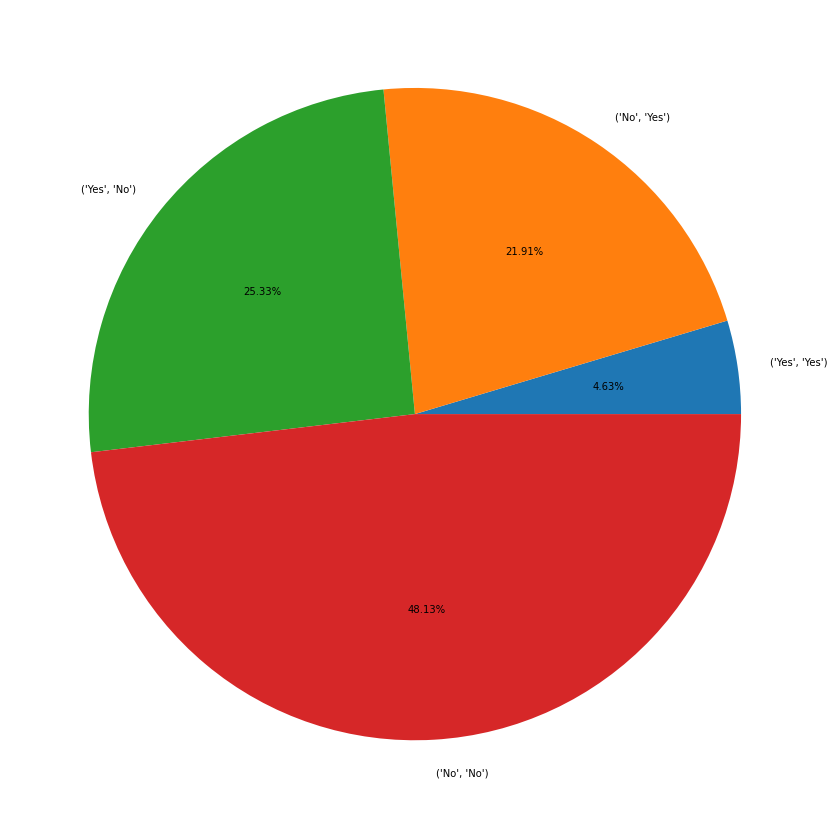

In [40]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who don't have dependents do minimum and maximum churn.

<AxesSubplot:xlabel='tenure', ylabel='count'>

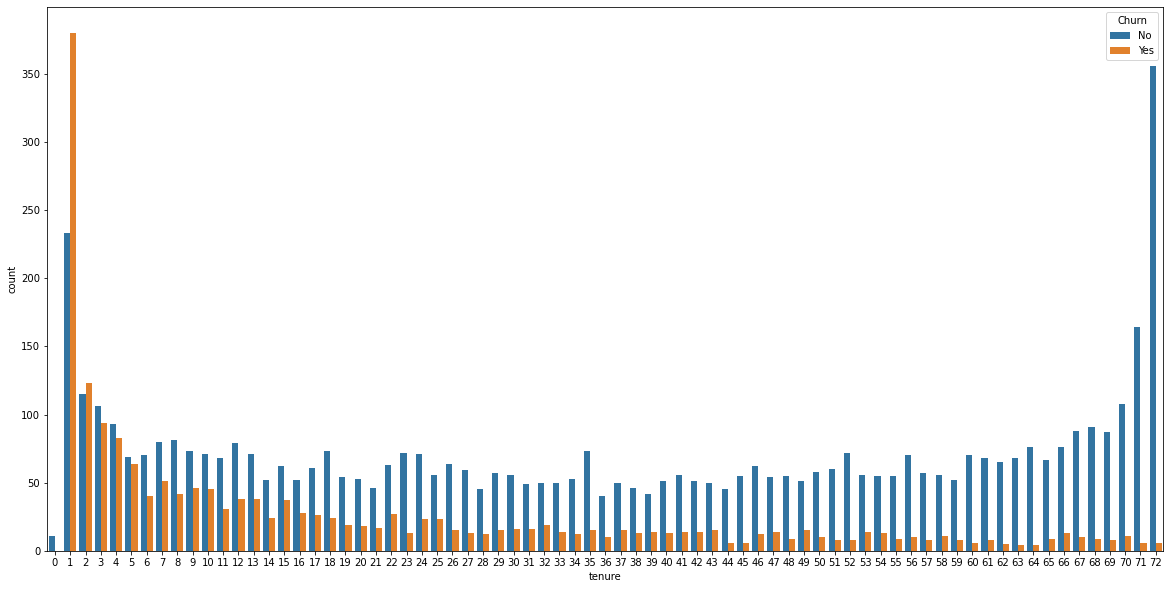

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['tenure'],hue=df['Churn'])


In [42]:
df.groupby("tenure")['Churn'].value_counts()

tenure  Churn
0       No        11
1       Yes      380
        No       233
2       Yes      123
        No       115
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Name: Churn, Length: 145, dtype: int64

In [43]:
label_df=df.groupby(["tenure","Churn"]).size().sort_values(ascending=False).index

In [44]:
val_df=df.groupby(["tenure","Churn"]).size().sort_values(ascending=False).values

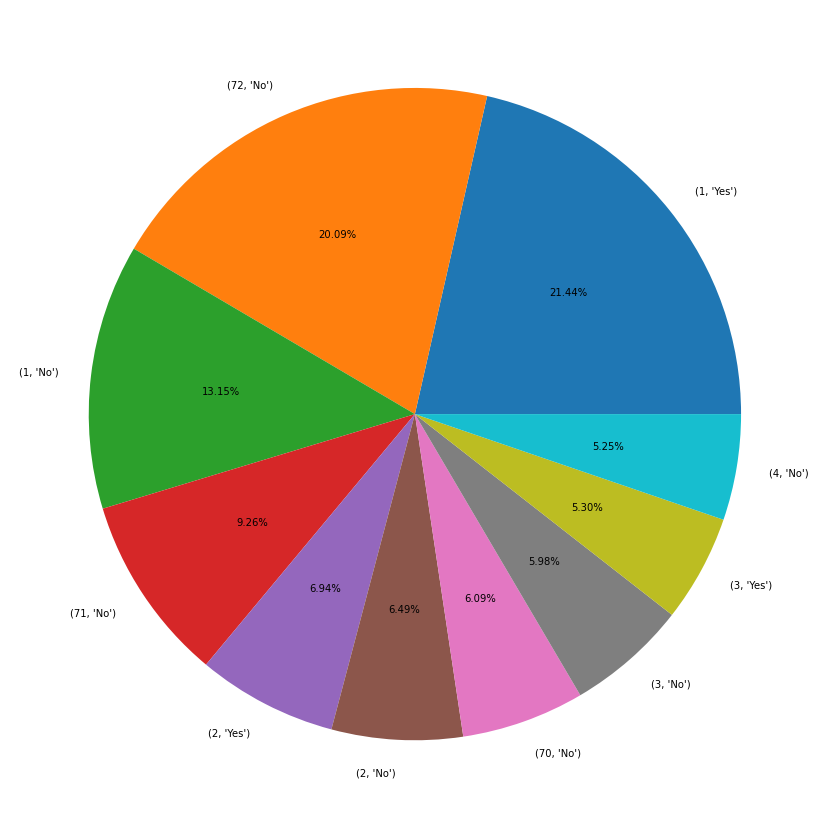

In [45]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have tenure of 1 months do maximum churn
2. Customers who have tenure of 72 months do minimum churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

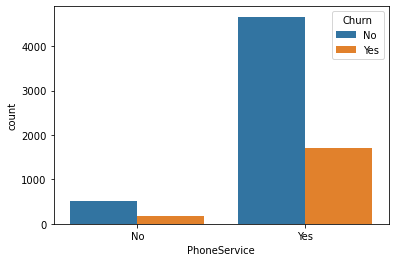

In [46]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

In [47]:
df.groupby("PhoneService")['Churn'].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

In [48]:
label_df=df.groupby(["PhoneService","Churn"]).size().sort_values(ascending=False).index

In [49]:
val_df=df.groupby(["PhoneService","Churn"]).size().sort_values(ascending=False).values

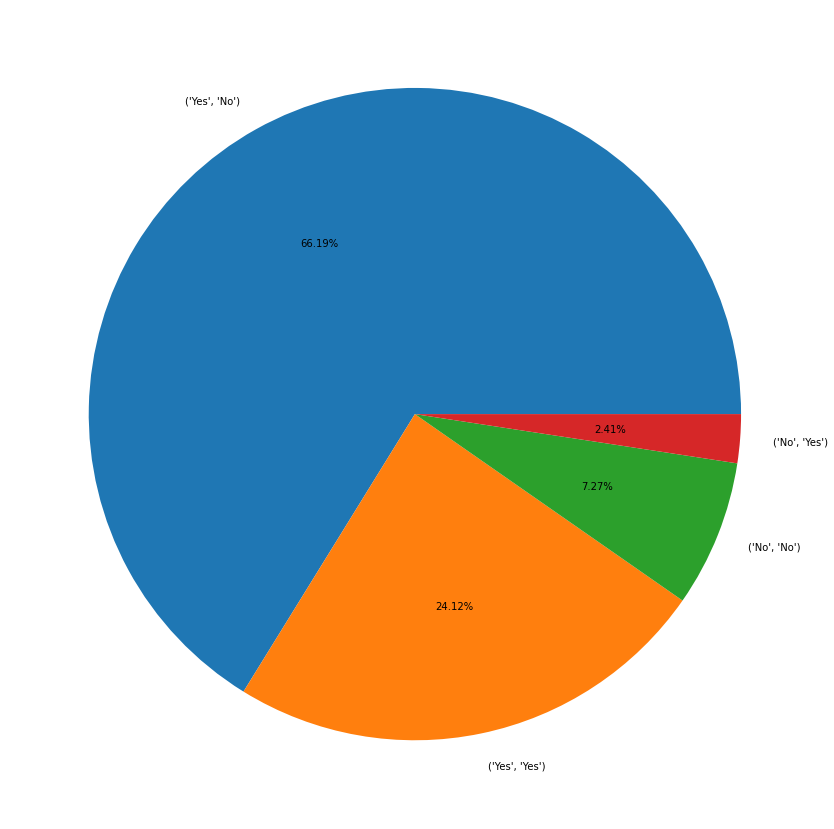

In [50]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have PhoneService do minimum churn.
2. Customers who have PhoneService do maximum churn.


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

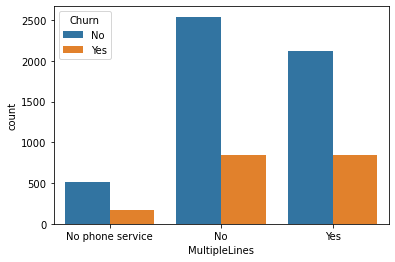

In [51]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

In [52]:
df.groupby("MultipleLines")['Churn'].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

In [53]:
label_df=df.groupby(["MultipleLines","Churn"]).size().sort_values(ascending=False).index

In [54]:
val_df=df.groupby(["MultipleLines","Churn"]).size().sort_values(ascending=False).values

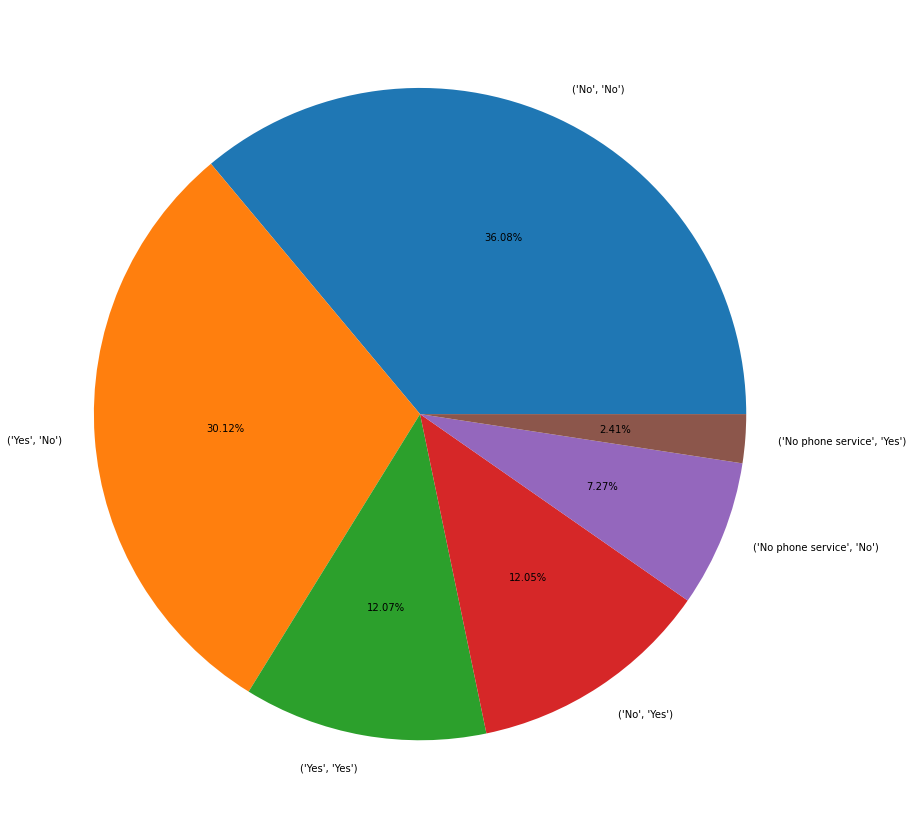

In [55]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who don't have MultipleLines Service do minimum churn
2. Customers who  have MultipleLines Service do maximum churn


<AxesSubplot:xlabel='InternetService', ylabel='count'>

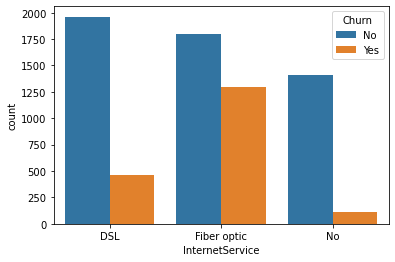

In [56]:
sns.countplot(x='InternetService',hue='Churn',data=df)

In [57]:
df.groupby("InternetService")['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64

In [58]:
label_df=df.groupby(["InternetService","Churn"]).size().sort_values(ascending=False).index

In [59]:
val_df=df.groupby(["InternetService","Churn"]).size().sort_values(ascending=False).values

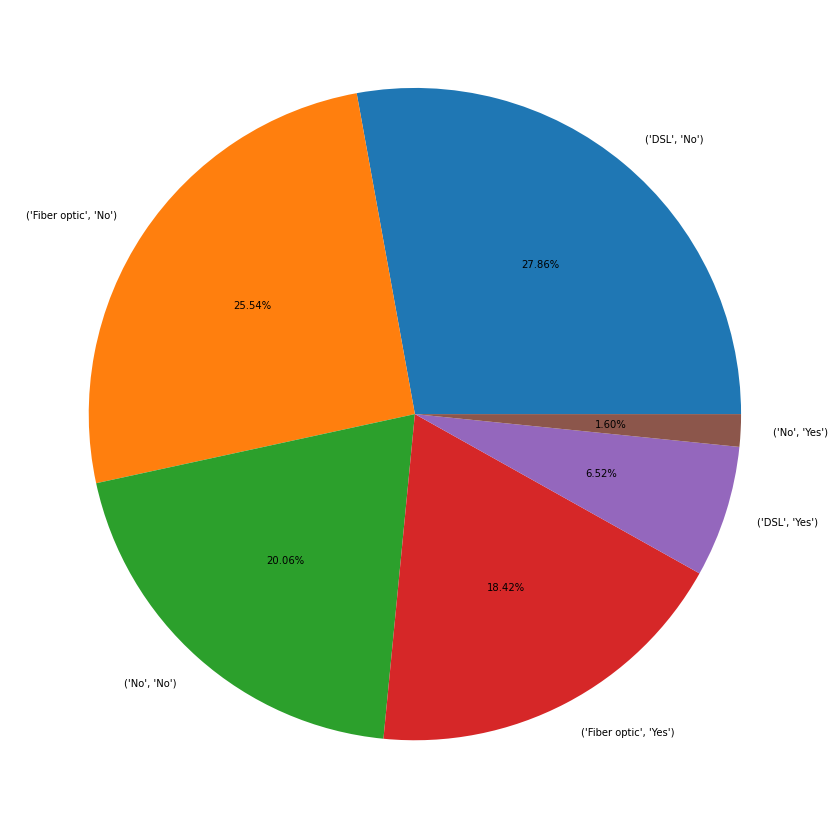

In [60]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having DSL internet service do minimum churn
2. Customer having Fiber Optic service do maximum churn

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

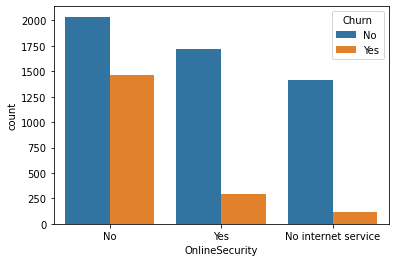

In [61]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

In [62]:
df.groupby("OnlineSecurity")['Churn'].value_counts()

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

In [63]:
label_df=df.groupby(["OnlineSecurity","Churn"]).size().sort_values(ascending=False).index

In [64]:
val_df=df.groupby(["OnlineSecurity","Churn"]).size().sort_values(ascending=False).values

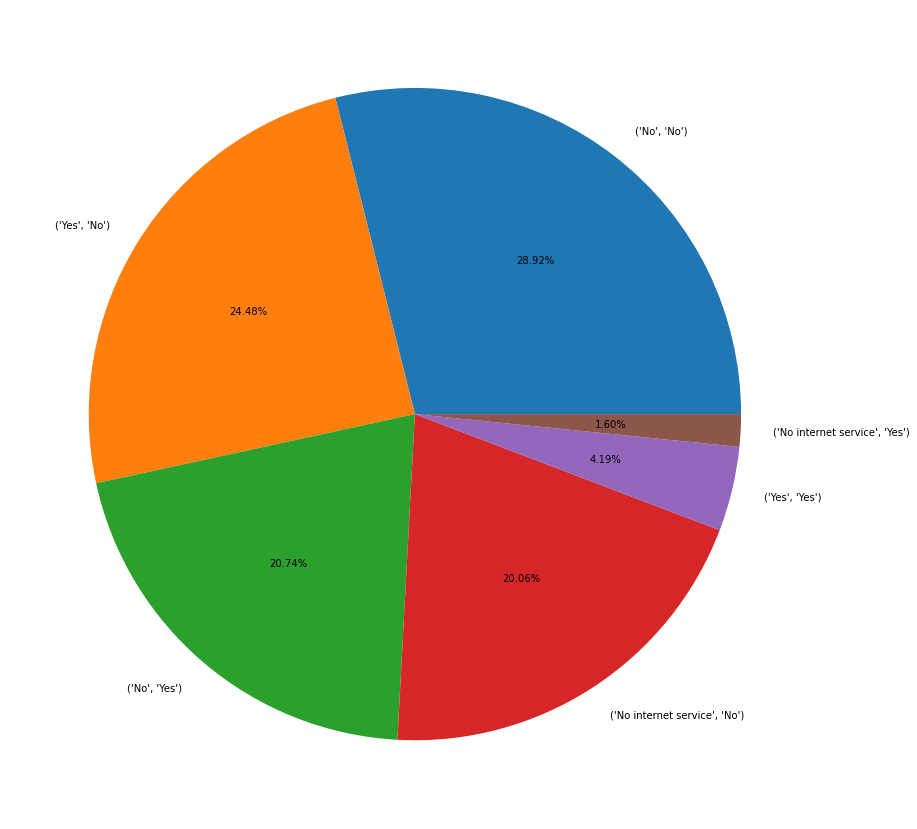

In [65]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no OnlineSecurity do minimum churn
2. Customers having no OnlineSecurity do maximum churn

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

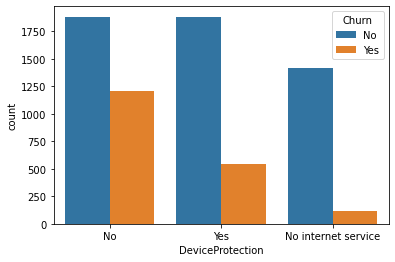

In [66]:
sns.countplot(x='DeviceProtection',hue='Churn',data=df)

In [67]:
df.groupby("DeviceProtection")['Churn'].value_counts()

DeviceProtection     Churn
No                   No       1884
                     Yes      1211
No internet service  No       1413
                     Yes       113
Yes                  No       1877
                     Yes       545
Name: Churn, dtype: int64

In [68]:
label_df=df.groupby(["DeviceProtection","Churn"]).size().sort_values(ascending=False).index

In [69]:
val_df=df.groupby(["DeviceProtection","Churn"]).size().sort_values(ascending=False).values

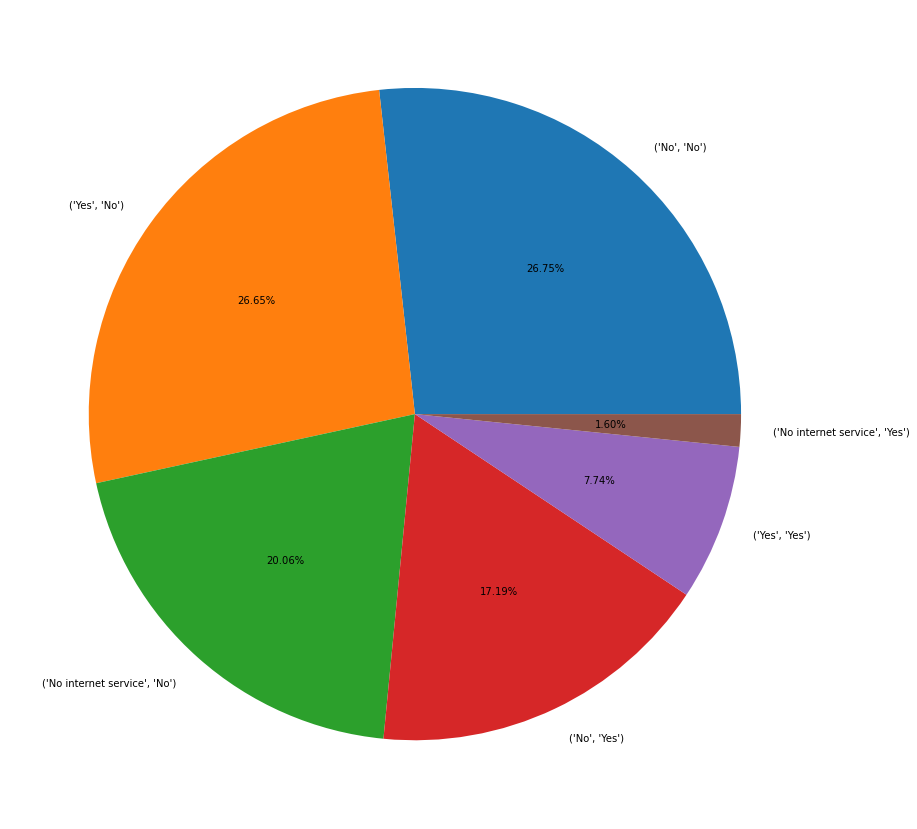

In [70]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no DeviceProtection do minimum churn
2. Customers having no DeviceProtection do maximum churn

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

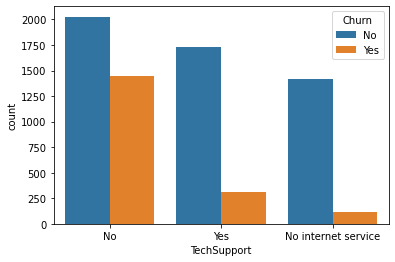

In [71]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

In [72]:
df.groupby("TechSupport")['Churn'].value_counts()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

In [73]:
label_df=df.groupby(["TechSupport","Churn"]).size().sort_values(ascending=False).index

In [74]:
val_df=df.groupby(["TechSupport","Churn"]).size().sort_values(ascending=False).values

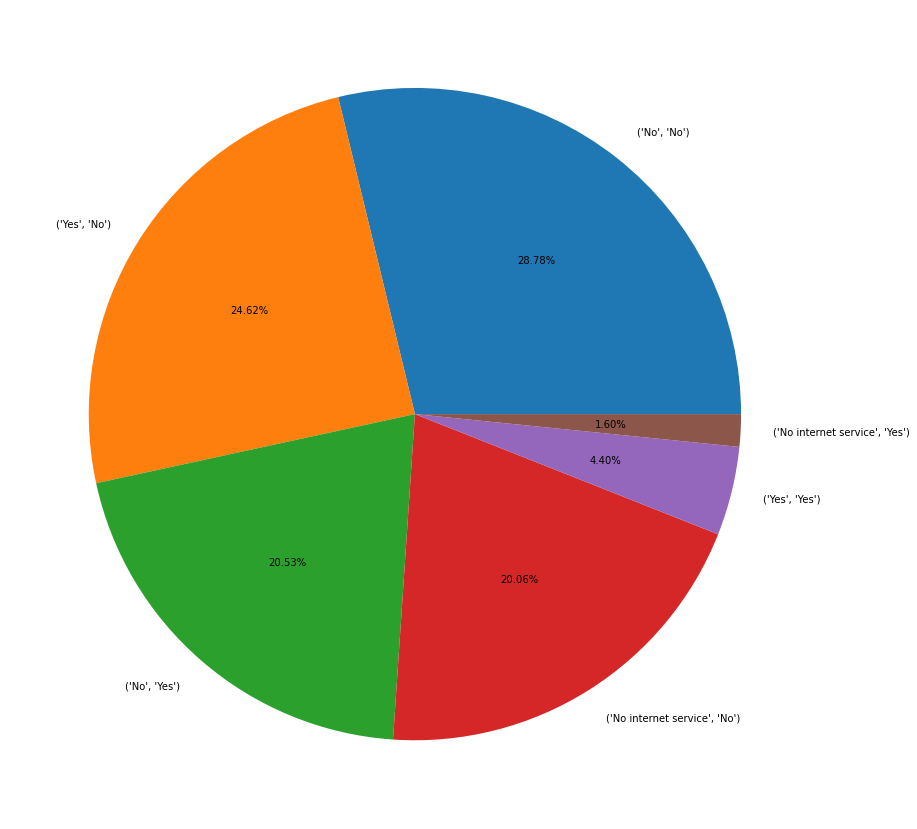

In [75]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no TechSupport do minimum churn
2. Customers having no TechSupport do maximum churn

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

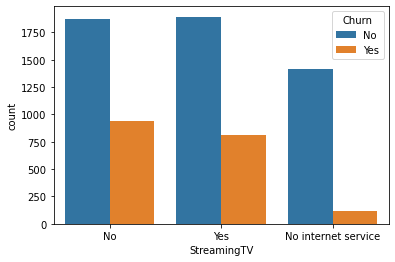

In [76]:
sns.countplot(x=df['StreamingTV'],hue=df['Churn'])

In [77]:
df.groupby("StreamingTV")['Churn'].value_counts()

StreamingTV          Churn
No                   No       1868
                     Yes       942
No internet service  No       1413
                     Yes       113
Yes                  No       1893
                     Yes       814
Name: Churn, dtype: int64

In [78]:
label_df=df.groupby(["StreamingTV","Churn"]).size().sort_values(ascending=False).index

In [79]:
val_df=df.groupby(["StreamingTV","Churn"]).size().sort_values(ascending=False).values

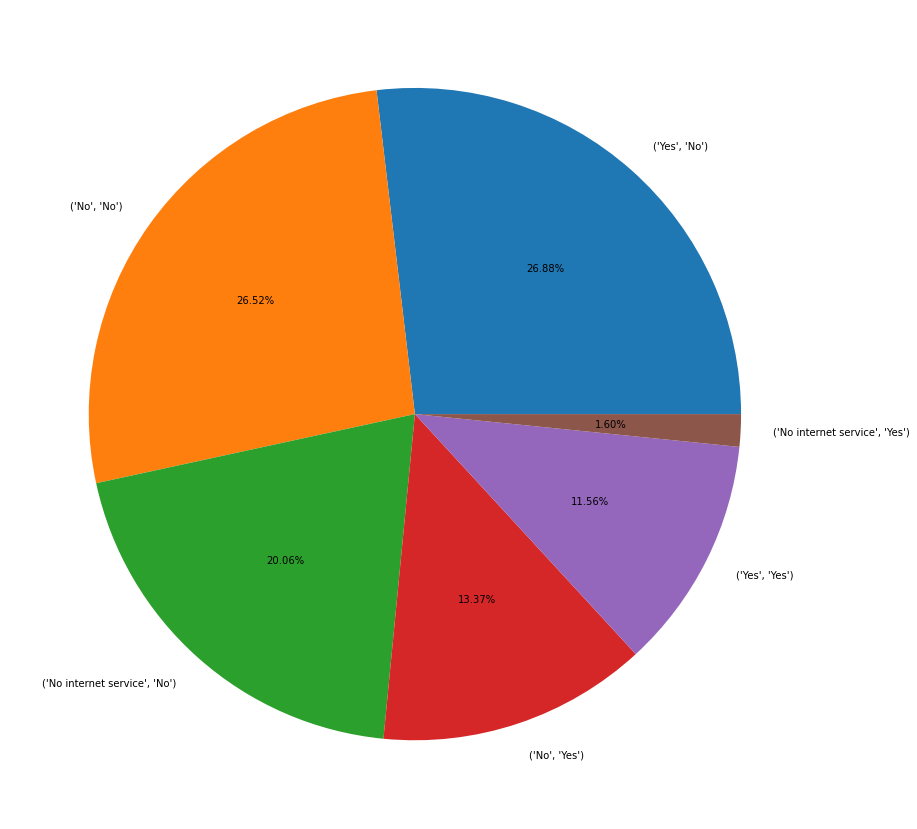

In [80]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  StreamingTV do minimum churn
2. Customers having no StreamingTV do maximum churn

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

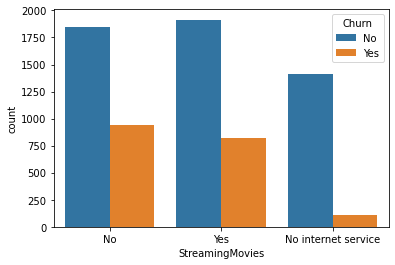

In [81]:
sns.countplot(x=df['StreamingMovies'],hue=df['Churn'])

In [82]:
df.groupby("StreamingMovies")['Churn'].value_counts()

StreamingMovies      Churn
No                   No       1847
                     Yes       938
No internet service  No       1413
                     Yes       113
Yes                  No       1914
                     Yes       818
Name: Churn, dtype: int64

In [83]:
label_df=df.groupby(["StreamingMovies","Churn"]).size().sort_values(ascending=False).index

In [84]:
val_df=df.groupby(["StreamingMovies","Churn"]).size().sort_values(ascending=False).values

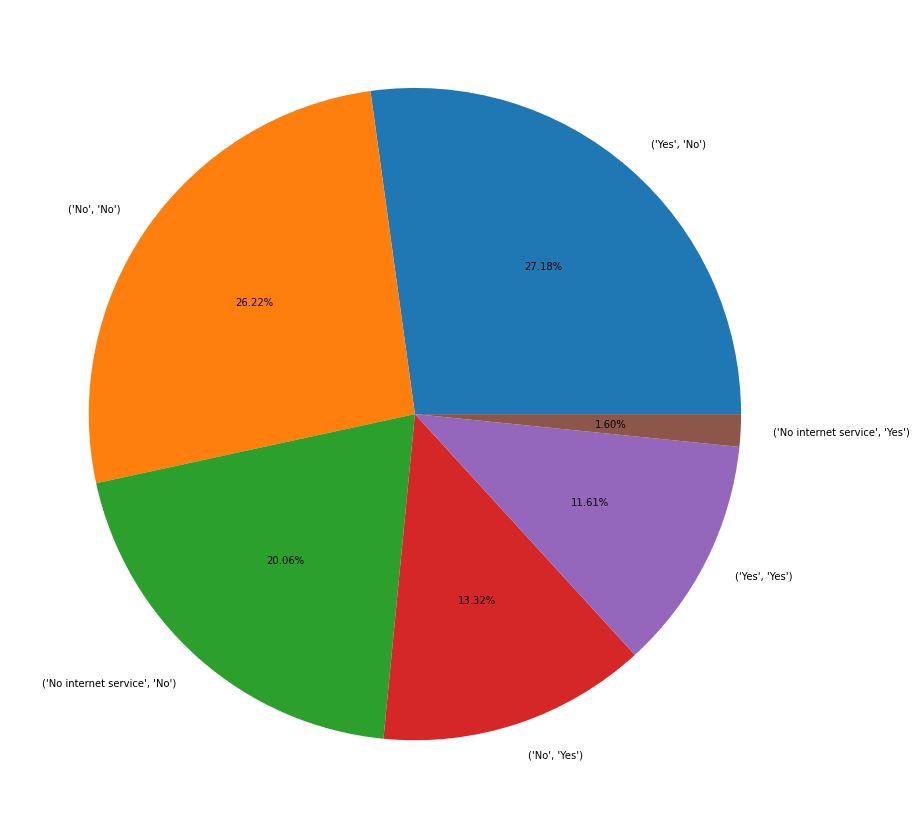

In [85]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  StreamingMovies do minimum churn
2. Customers having no StreamingMovies do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

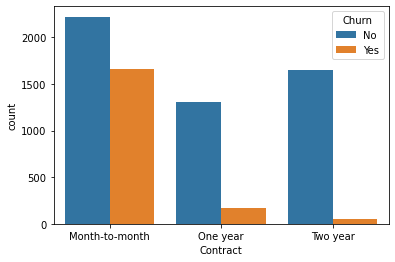

In [86]:
sns.countplot(df['Contract'],hue=df['Churn'])

In [87]:
df.groupby("Contract")['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

In [88]:
label_df=df.groupby(["Contract","Churn"]).size().sort_values(ascending=False).index

In [89]:
val_df=df.groupby(["Contract","Churn"]).size().sort_values(ascending=False).values

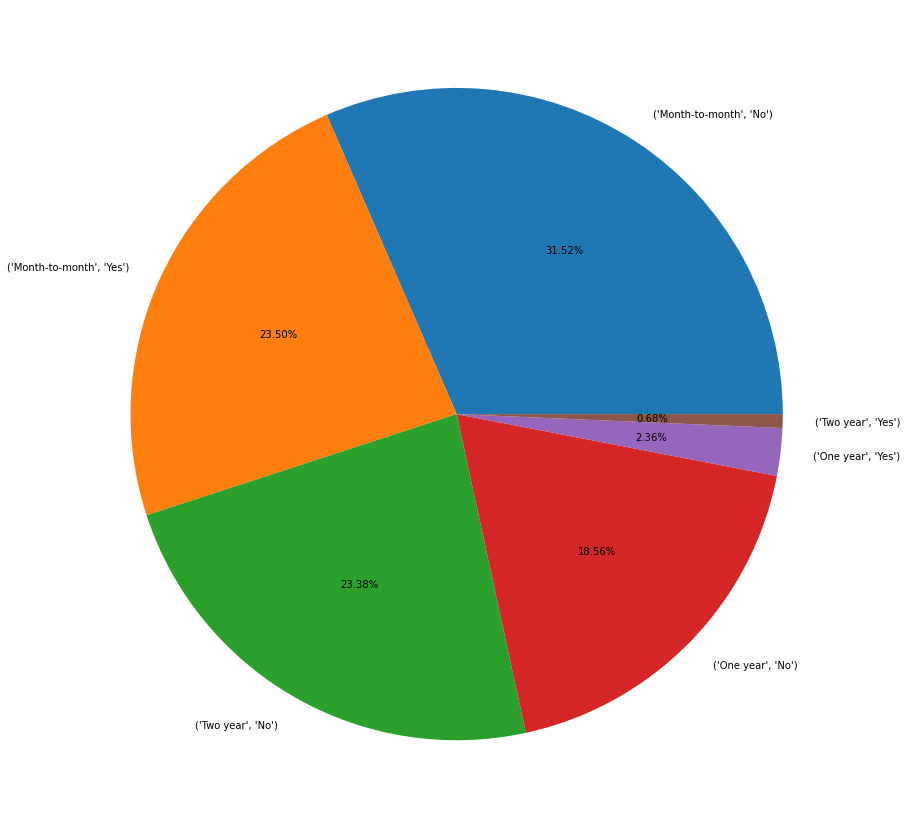

In [90]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  Contract month-to-month do minimum churn
2. Customers having  Contract month-to-month do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

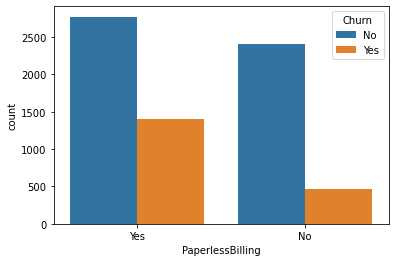

In [91]:
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

In [92]:
df.groupby("PaperlessBilling")['Churn'].value_counts()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: Churn, dtype: int64

# Observations:
1. Customers having PaperlessBilling do minimum churn
2. Customers having PaperlessBilling do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

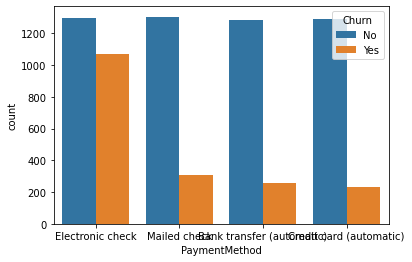

In [93]:
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

In [94]:
label_df=df.groupby(["PaymentMethod","Churn"]).size().sort_values(ascending=False).index

In [95]:
val_df=df.groupby(["PaymentMethod","Churn"]).size().sort_values(ascending=False).values

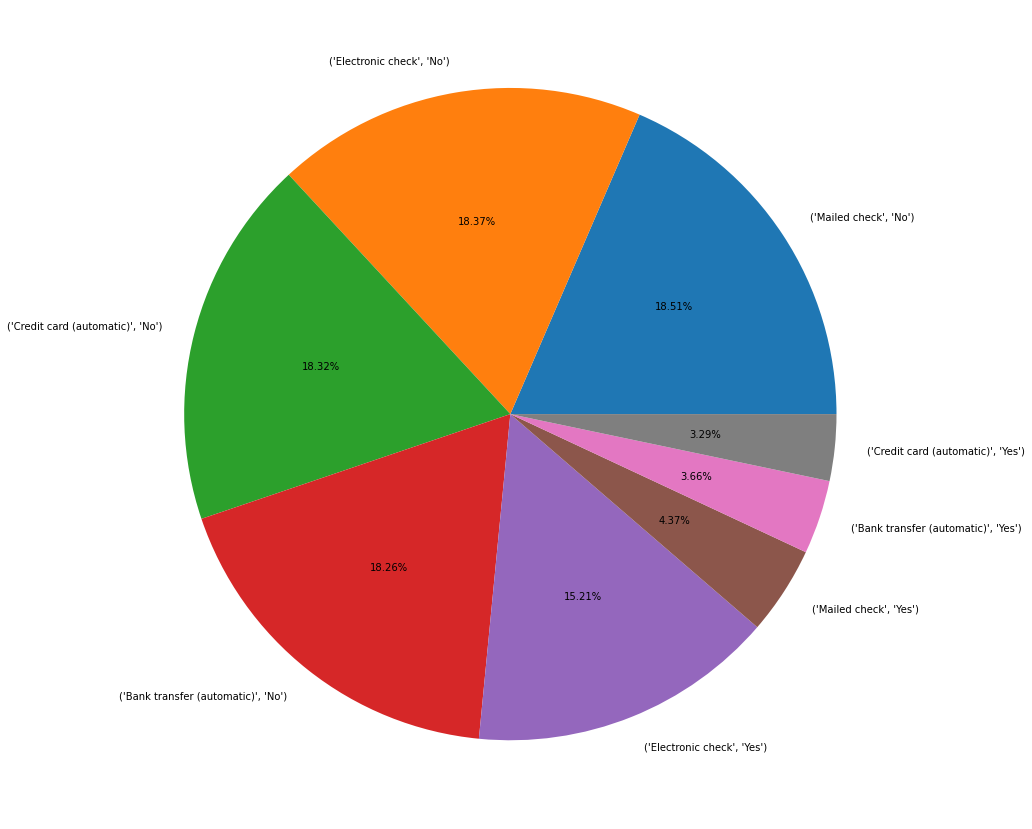

In [96]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [97]:
df.groupby("PaymentMethod")['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: Churn, dtype: int64

# Observations:
1. Customers having mailed check do minimum churn
2. Customers having Electronic check do maximum churn

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

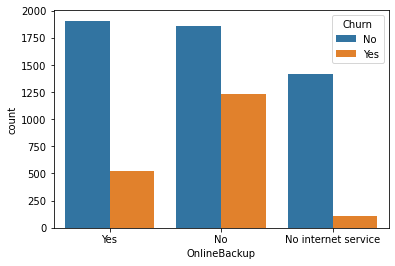

In [98]:
sns.countplot(x=df['OnlineBackup'],hue=df['Churn'])

In [99]:
df.groupby("OnlineBackup")['Churn'].value_counts()

OnlineBackup         Churn
No                   No       1855
                     Yes      1233
No internet service  No       1413
                     Yes       113
Yes                  No       1906
                     Yes       523
Name: Churn, dtype: int64

In [100]:
label_df=df.groupby(["OnlineBackup","Churn"]).size().sort_values(ascending=False).index

In [101]:
val_df=df.groupby(["OnlineBackup","Churn"]).size().sort_values(ascending=False).values

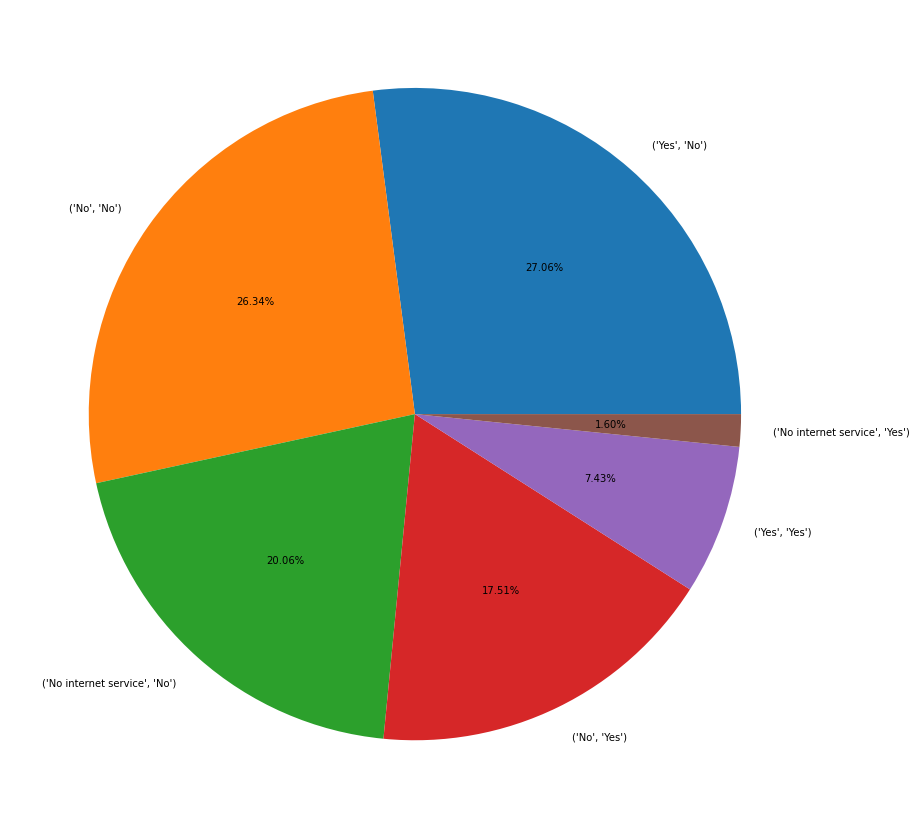

In [102]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having OnlineBackup do minimum churn
2. Customers having no OnlineBackup do maximum churn

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

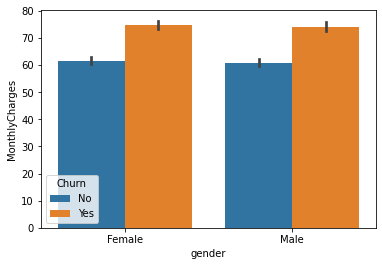

In [103]:
sns.barplot(x='gender',y='MonthlyCharges',data=df,hue='Churn')

In [104]:
df.groupby(["gender","Churn"])['MonthlyCharges'].mean()

gender  Churn
Female  No       61.664908
        Yes      74.812087
Male    No       60.876914
        Yes      74.066989
Name: MonthlyCharges, dtype: float64

In [105]:
label_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).index

In [106]:
val_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values(ascending=False).values

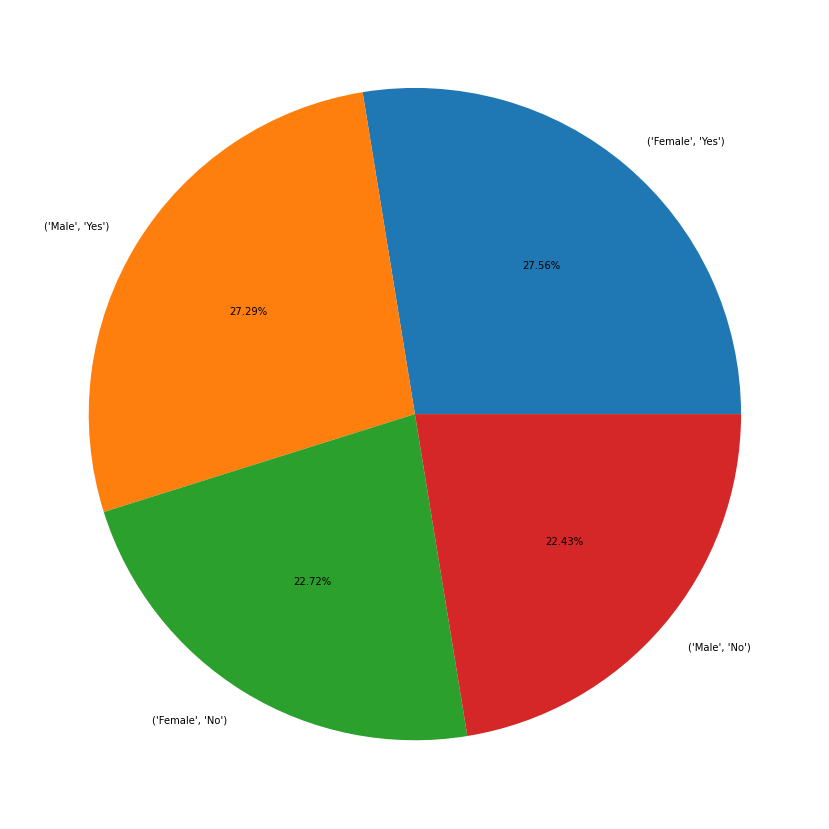

In [107]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers do maximum churn
2. Female Customers do minimum churn


<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

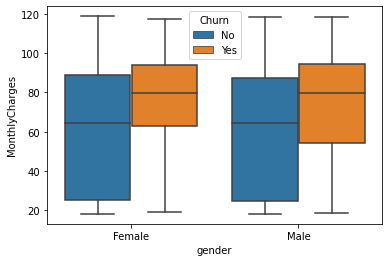

In [108]:
sns.boxplot(x=df['gender'],y=df['MonthlyCharges'],hue=df['Churn'])

In [109]:
label_df=df.groupby(["gender","Churn"])['MonthlyCharges'].median().sort_values().index

In [110]:
val_df=df.groupby(["gender","Churn"])['MonthlyCharges'].median().sort_values().values

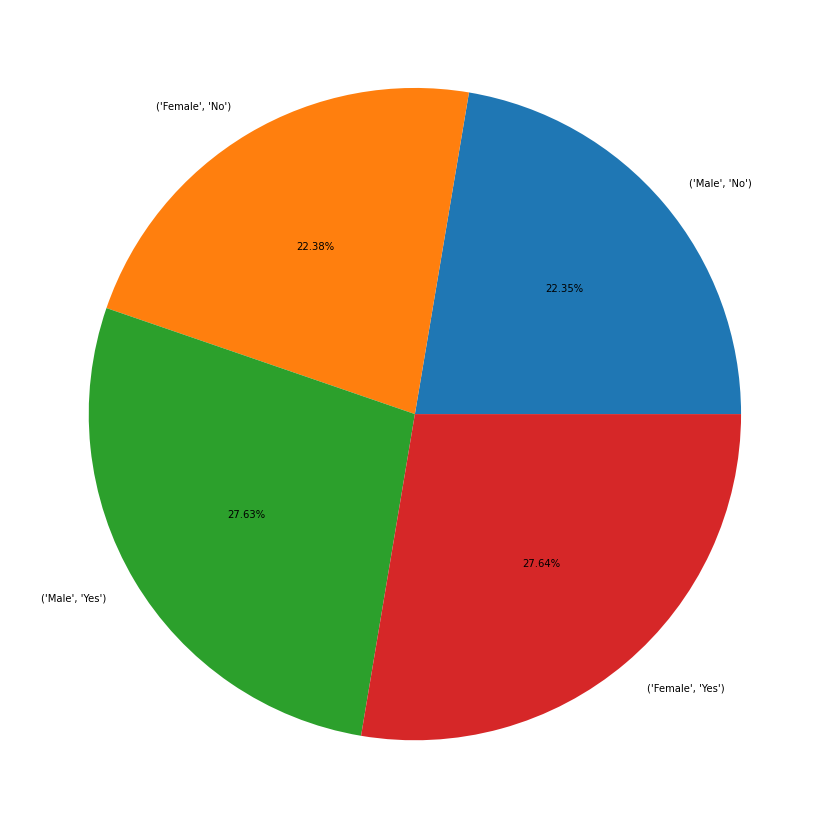

In [111]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers do maximum churn
2. Female Customers do minimum churn


<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

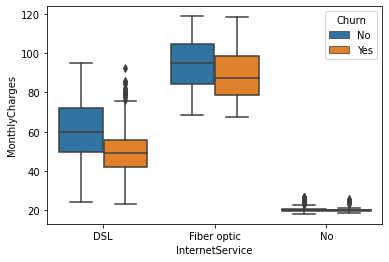

In [112]:
sns.boxplot(x=df['InternetService'],y=df['MonthlyCharges'],hue=df['Churn'])

In [113]:
df.groupby(["InternetService","Churn"])['MonthlyCharges'].median()

InternetService  Churn
DSL              No       59.75
                 Yes      49.25
Fiber optic      No       94.80
                 Yes      87.55
No               No       20.15
                 Yes      20.00
Name: MonthlyCharges, dtype: float64

In [114]:
label_df=df.groupby(["InternetService","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).index

In [115]:
val_df=df.groupby(["InternetService","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).values

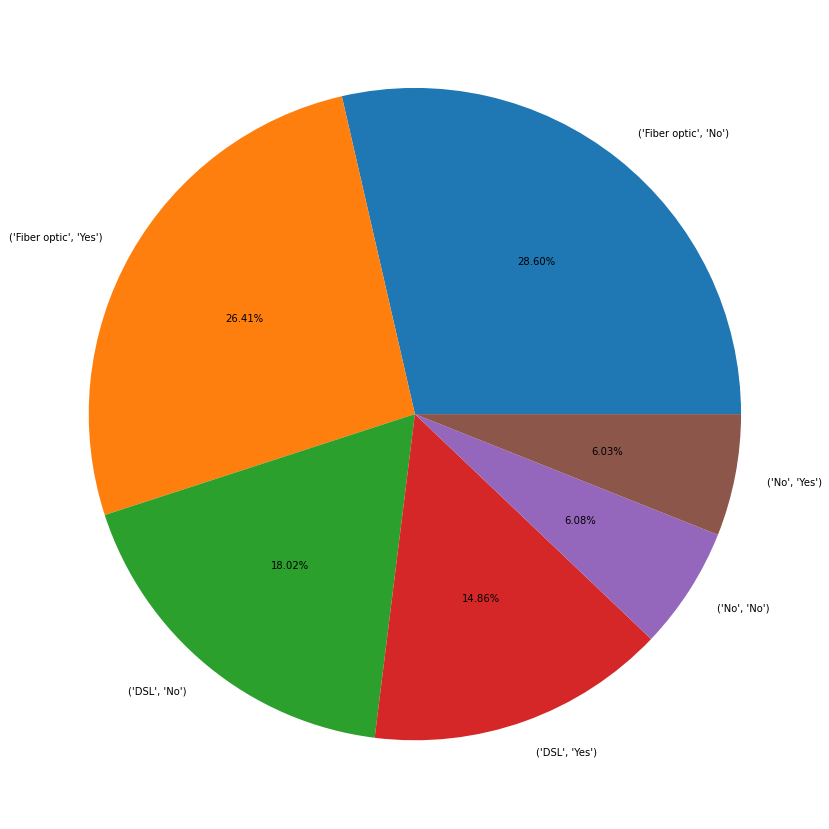

In [116]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Monthly charges for Fiber optic is more as compared to DSL
2. Monthly charges for churn customers are low as compared to non-churn customers for DSL
3. Monthly charges for churn customers are low as compared to non-churn customers for Fiber optic


<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

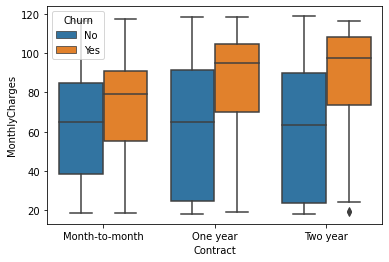

In [117]:
sns.boxplot(x=df['Contract'],y=df['MonthlyCharges'],hue=df['Churn'])

In [118]:
df.groupby(["Contract","Churn"])['MonthlyCharges'].median()

Contract        Churn
Month-to-month  No       64.950
                Yes      79.050
One year        No       64.850
                Yes      95.050
Two year        No       63.300
                Yes      97.275
Name: MonthlyCharges, dtype: float64

In [119]:
label_df=df.groupby(["Contract","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).index

In [120]:
val_df=df.groupby(["Contract","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).values

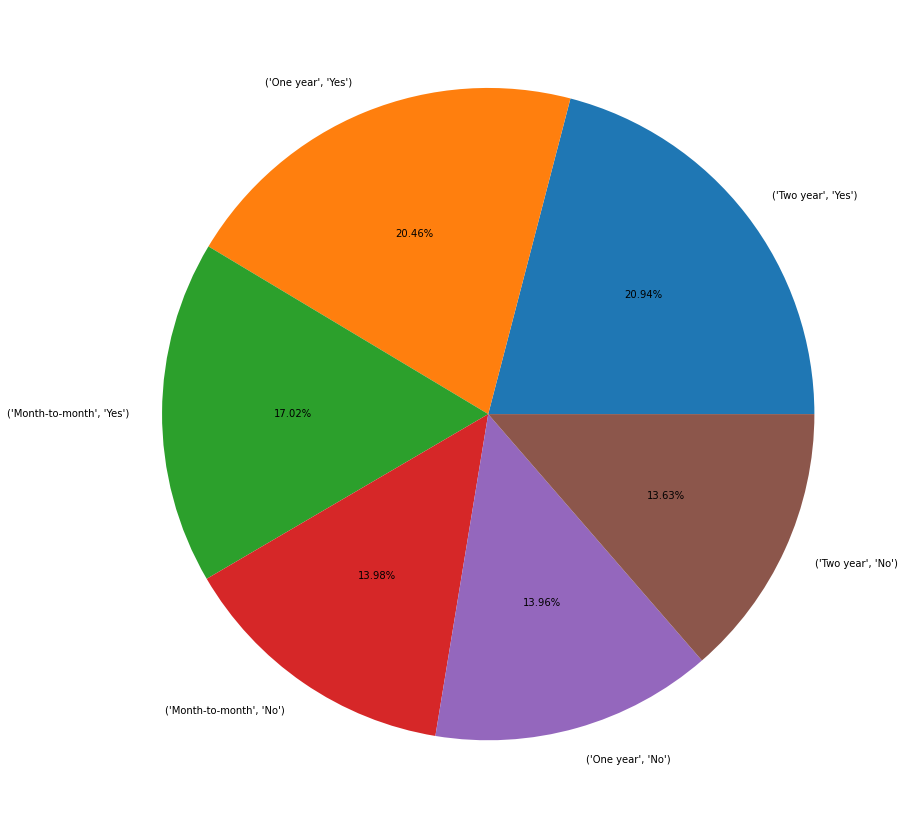

In [121]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Monthly charges for two year contract who churn is maximum : 97.25
2. Monthly charges for two year contract who churn is mainimum : 63.300

<AxesSubplot:xlabel='PaymentMethod', ylabel='MonthlyCharges'>

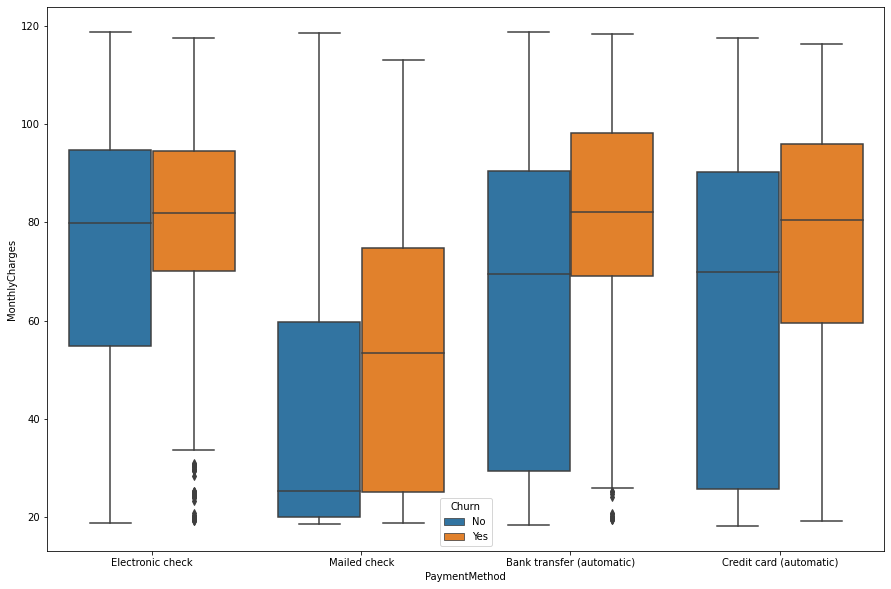

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['MonthlyCharges'],hue=df['Churn'])

In [123]:
label_df=df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).index

In [124]:
val_df=df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).values

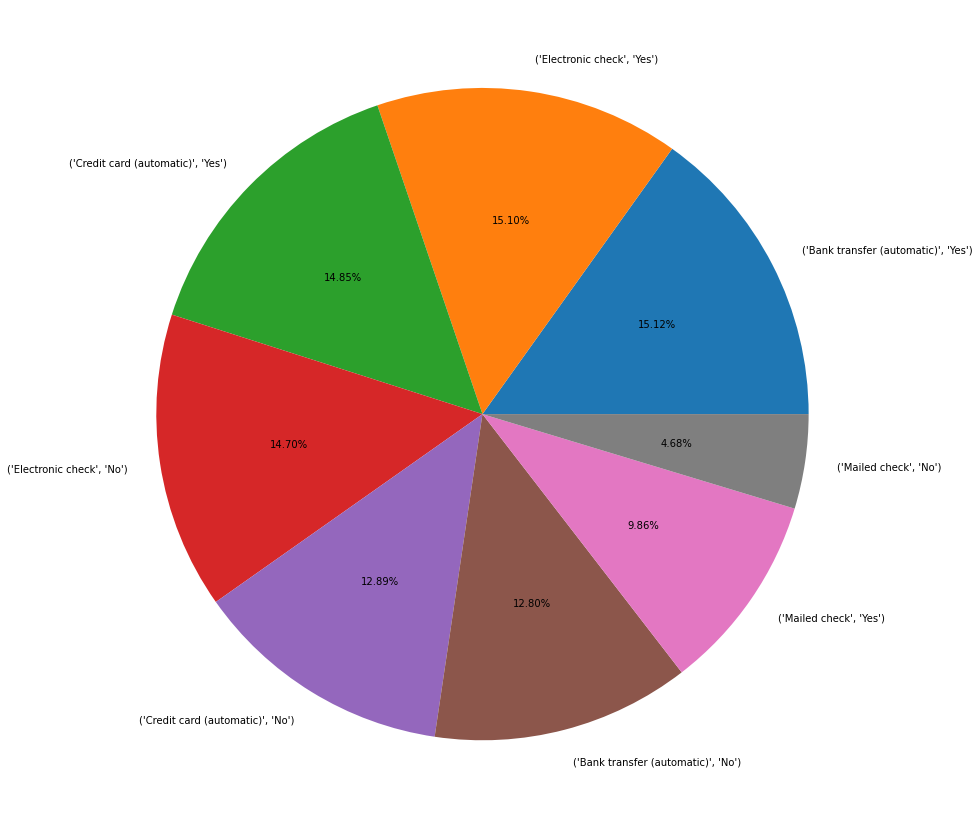

In [125]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [126]:
df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].median()

PaymentMethod              Churn
Bank transfer (automatic)  No       69.475
                           Yes      82.075
Credit card (automatic)    No       69.950
                           Yes      80.575
Electronic check           No       79.800
                           Yes      81.950
Mailed check               No       25.400
                           Yes      53.525
Name: MonthlyCharges, dtype: float64

# Observations:
1. Monthly charges for Bank transfer (automatic) who churn is maximum : 82.075
2. Monthly charges for Mailed check who do not churn is minimum : 25.400

<AxesSubplot:xlabel='PaperlessBilling', ylabel='MonthlyCharges'>

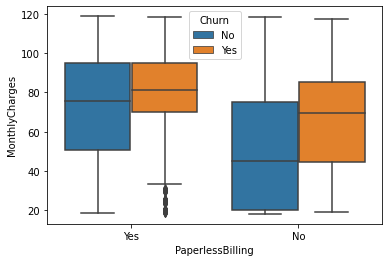

In [127]:
sns.boxplot(x=df['PaperlessBilling'],y=df['MonthlyCharges'],hue=df['Churn'])

In [128]:
df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].median()

PaperlessBilling  Churn
No                No       45.30
                  Yes      69.75
Yes               No       75.90
                  Yes      81.20
Name: MonthlyCharges, dtype: float64

# Observations:
1. Monthly charges for PaperlessBilling who churn is maximum : 81.20
2. Monthly charges for No PaperlessBilling who do not churn is minimum : 45.30

In [129]:
label_df=df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).index

In [130]:
val_df=df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].median().sort_values(ascending=False).values

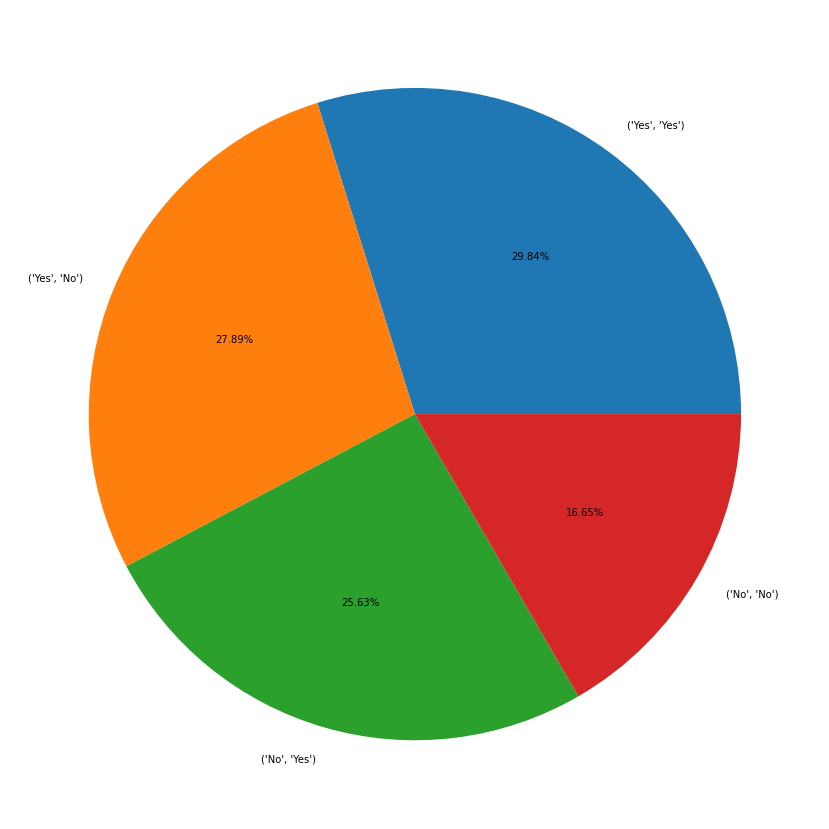

In [131]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [132]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [133]:
def Convert(val):
    val=str(val)
    
    if val=="\n":
        return float(0)
    elif val==" ":
        return float(0)
    else:
        return float(val)

In [134]:
df['TotalCharges']=df['TotalCharges'].apply(Convert)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

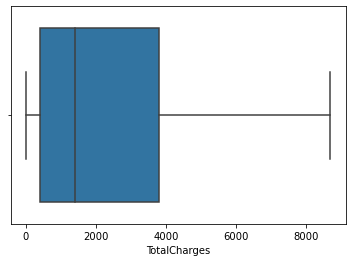

In [135]:
sns.boxplot(df['TotalCharges'])

In [136]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

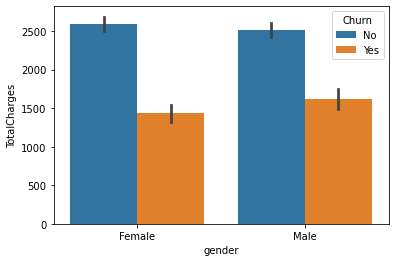

In [137]:
sns.barplot(x='gender',y='TotalCharges',data=df,hue='Churn')

In [138]:
df.groupby(["gender","Churn"])['TotalCharges'].mean()

gender  Churn
Female  No       2588.966046
        Yes      1440.979499
Male    No       2511.987562
        Yes      1623.491559
Name: TotalCharges, dtype: float64

In [139]:
label_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values(ascending=False).index

In [140]:
val_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values(ascending=False).values

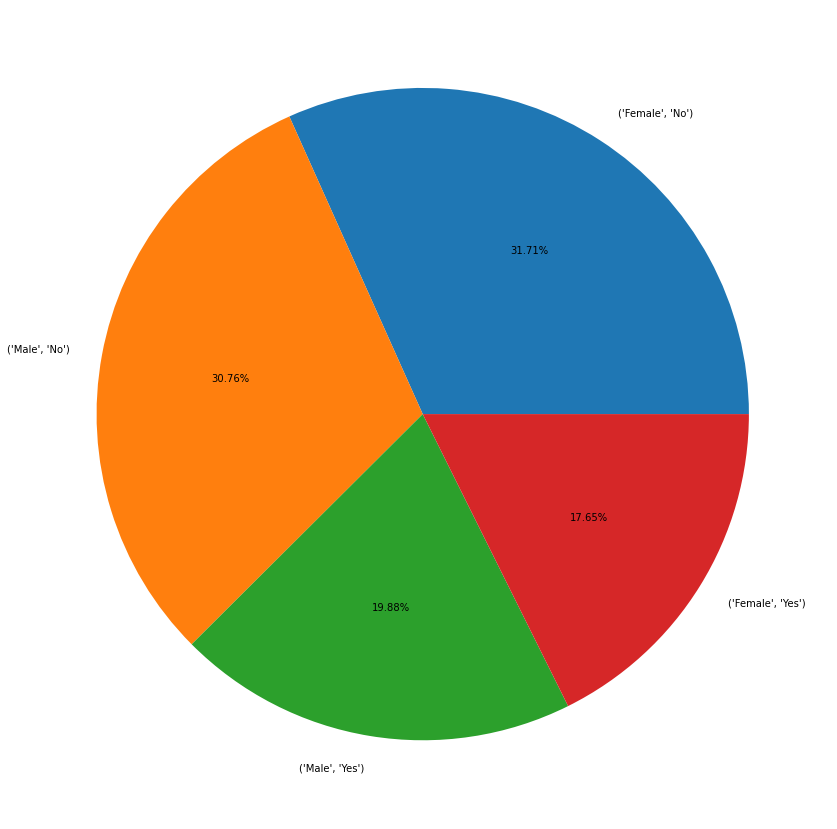

In [141]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers who don't churn has maximum avg total charges : 2588.966046
2. Female Customers who churn has minimum avg total charges : 1440.979499

<AxesSubplot:>

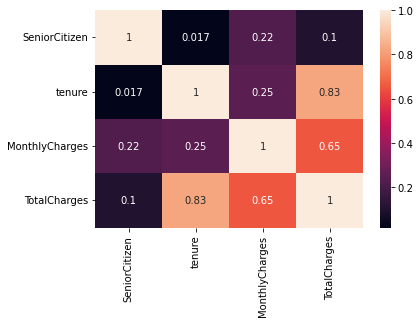

In [142]:
sns.heatmap(df.corr(),annot=True)

In [143]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [144]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

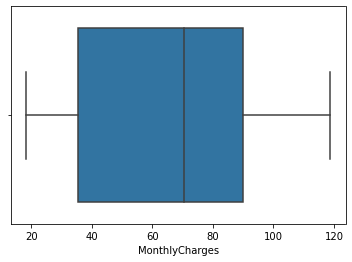

In [145]:
sns.boxplot(df['MonthlyCharges'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

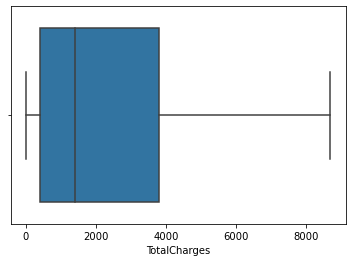

In [146]:
sns.boxplot(df['TotalCharges'])

In [147]:
q0=df['TotalCharges'].quantile(0.25)

In [148]:
q0

398.55

In [149]:
q1=df['TotalCharges'].quantile(0.50)

In [150]:
q1

1394.55

In [151]:
q3=df['TotalCharges'].quantile(0.75)

In [152]:
q3

3786.6

In [153]:
IQR=q3-q1

In [154]:
IQR

2392.05

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

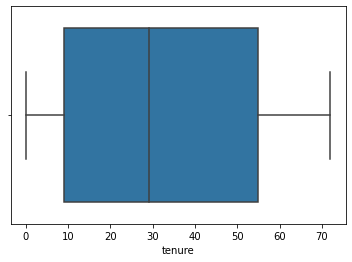

In [155]:
sns.boxplot(df['tenure'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

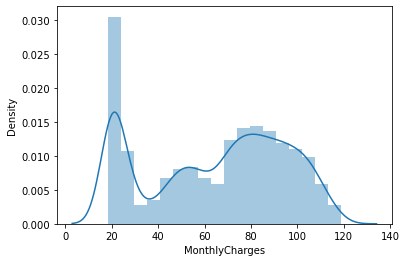

In [156]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

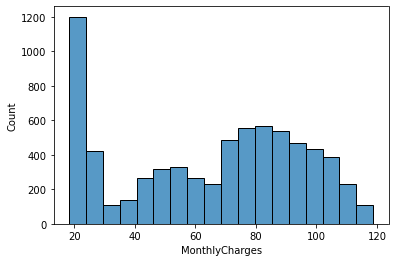

In [157]:
sns.histplot(data=df,x='MonthlyCharges')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

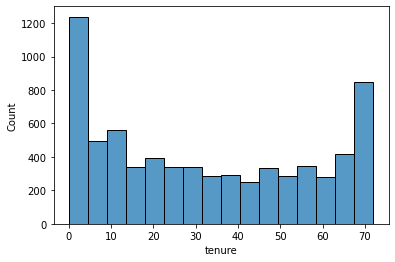

In [158]:
sns.histplot(df['tenure'])

# Observations:
1. Tenure between 0 to 10 is maximum

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

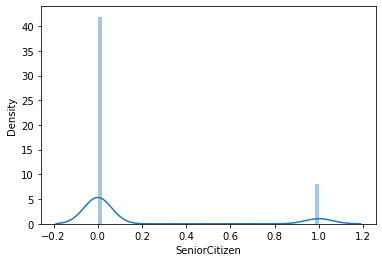

In [159]:
sns.distplot(df['SeniorCitizen'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

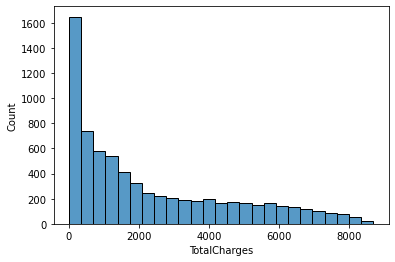

In [160]:
sns.histplot(df['TotalCharges'])

# Observations:
1. Maximum total chrages are maximum between 0 and 2000

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

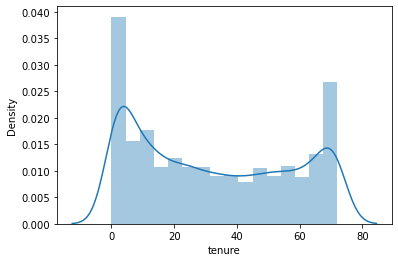

In [161]:
sns.distplot(df['tenure'])

In [162]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='PaperlessBilling', ylabel='TotalCharges'>

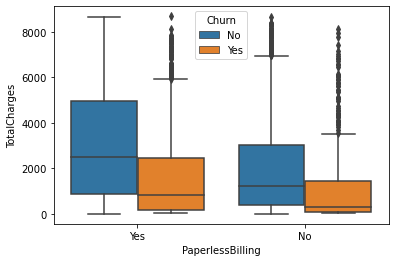

In [163]:
sns.boxplot(x=df['PaperlessBilling'],y=df['TotalCharges'],hue=df['Churn'])

In [164]:
df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].median()

PaperlessBilling  Churn
No                No       1215.100
                  Yes       309.100
Yes               No       2479.050
                  Yes       831.375
Name: TotalCharges, dtype: float64

In [165]:
label_df=df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].median().sort_values(ascending=False).index

In [166]:
val_df=df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].median().sort_values(ascending=False).values

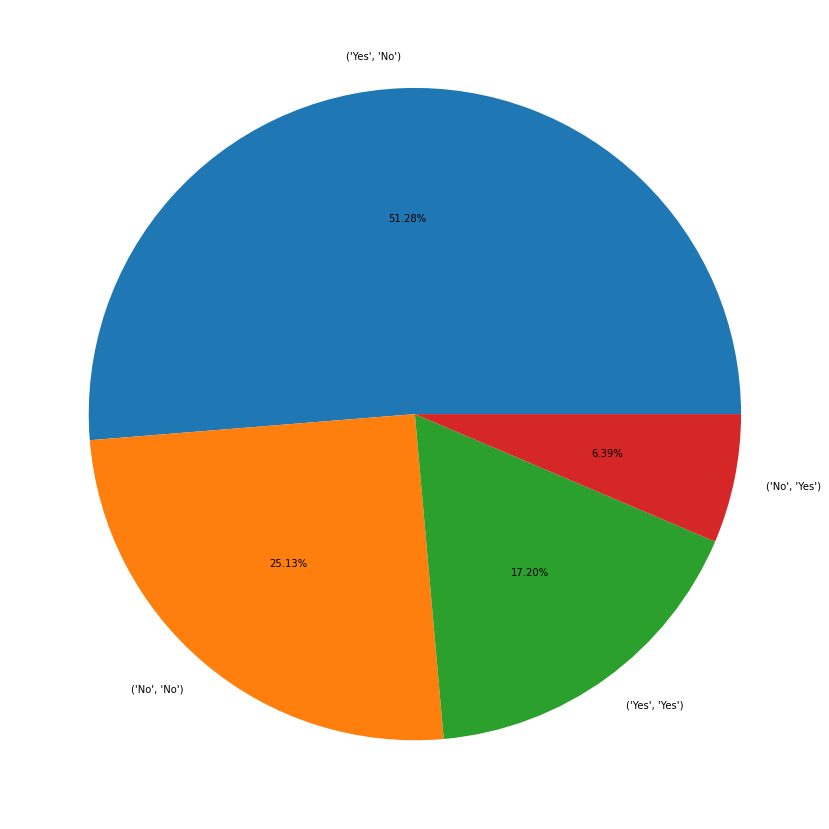

In [167]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have PaperlessBilling service and who don't churn has maximum total bill amount :3049.879592 
2. Customers who don't have PaperlessBilling service and who do churn has minimum total bill amount :1196.915991 


<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

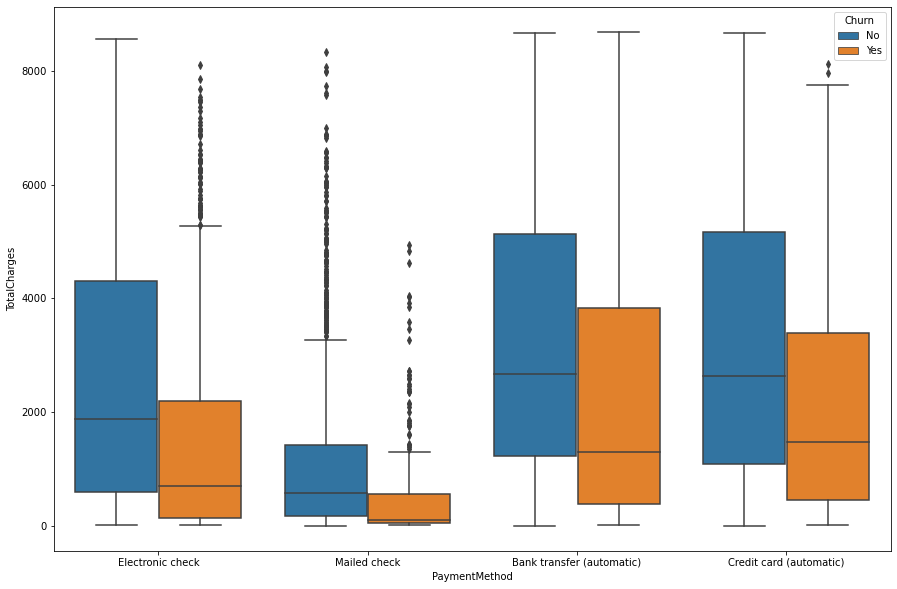

In [168]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['TotalCharges'],hue=df['Churn'])
#multivariate analysis

In [169]:
label_df=df.groupby(["PaymentMethod","Churn"])['TotalCharges'].median().sort_values(ascending=False).index

In [170]:
val_df=df.groupby(["PaymentMethod","Churn"])['TotalCharges'].median().sort_values(ascending=False).values

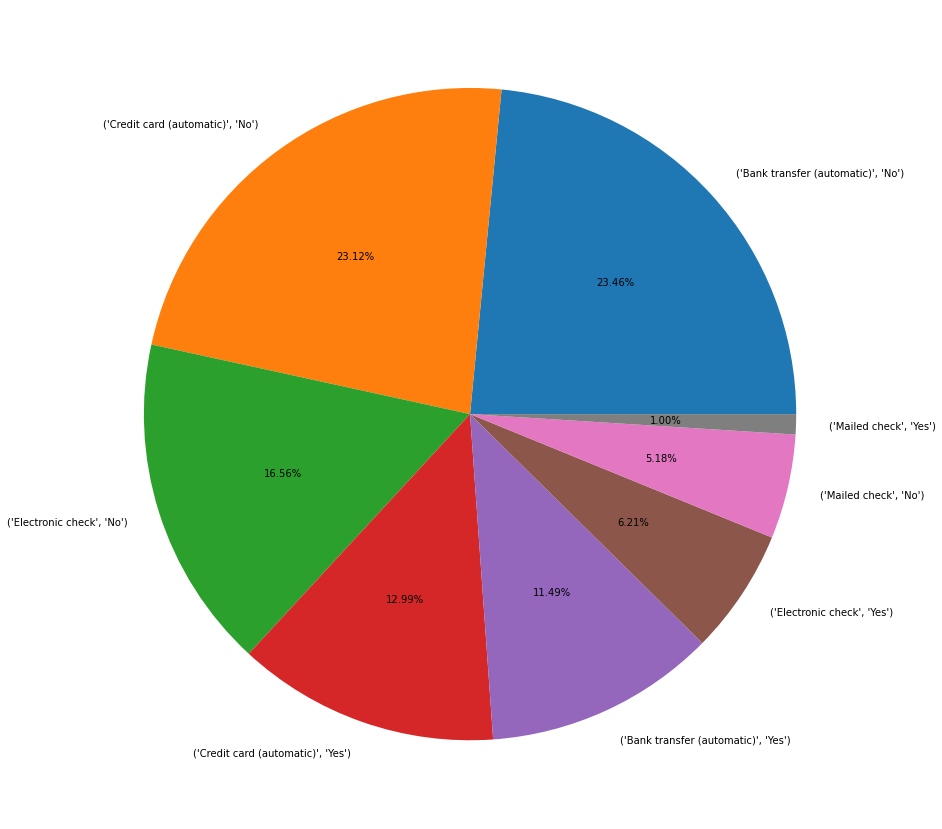

In [171]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [172]:
df.groupby(["PaymentMethod","Churn"])['TotalCharges'].median()

PaymentMethod              Churn
Bank transfer (automatic)  No       2668.875
                           Yes      1306.700
Credit card (automatic)    No       2630.325
                           Yes      1478.400
Electronic check           No       1883.850
                           Yes       706.600
Mailed check               No        588.900
                           Yes       113.700
Name: TotalCharges, dtype: float64

# Observations:
1. Customers who have Mailed check payment method service and who do churn has minimum total bill amount :113.700 
2. Customers who have Bank transfer (automatic) payment method service and who do not churn has maximum total bill amount : 2668.875


<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

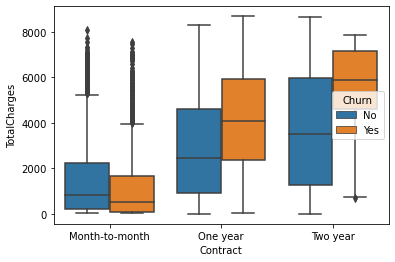

In [173]:
sns.boxplot(x=df['Contract'],y=df['TotalCharges'],hue=df['Churn'])

In [174]:
df.groupby(["Contract","Churn"])['TotalCharges'].median()

Contract        Churn
Month-to-month  No        830.525
                Yes       514.000
One year        No       2475.350
                Yes      4098.525
Two year        No       3510.300
                Yes      5874.250
Name: TotalCharges, dtype: float64

In [175]:
label_df=df.groupby(["Contract","Churn"])['TotalCharges'].median().sort_values(ascending=False).index

In [176]:
val_df=df.groupby(["Contract","Churn"])['TotalCharges'].median().sort_values(ascending=False).values

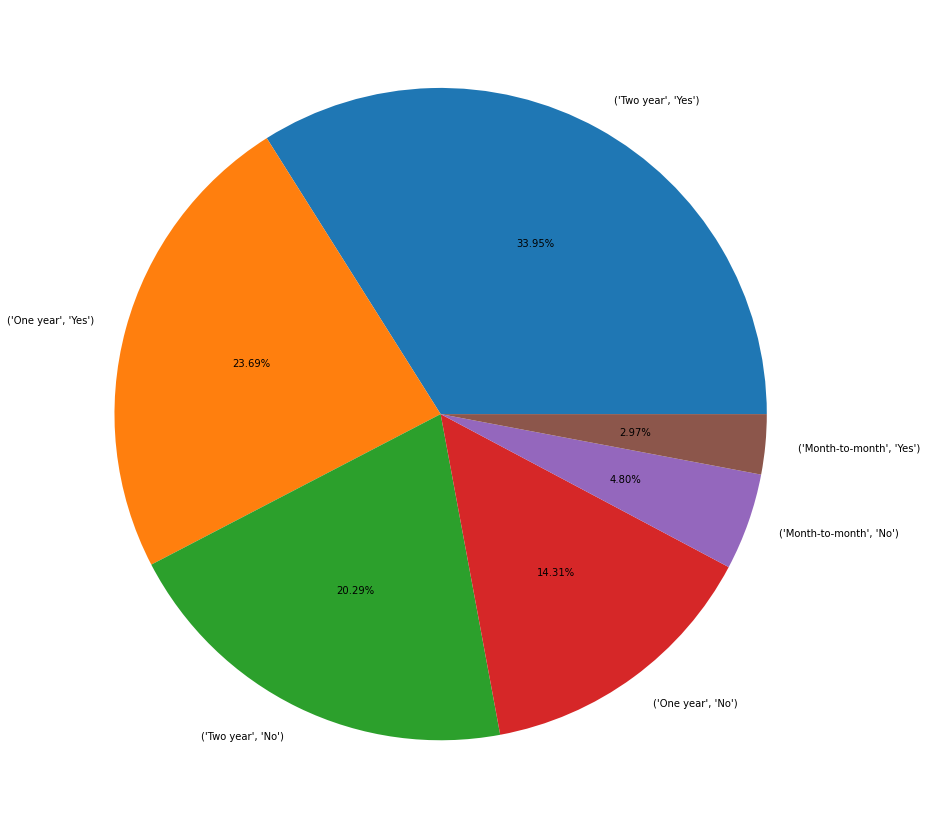

In [177]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have Contract of two year and who do churn has maximum total bill amount :5874.250 
2. Customers who have Contract of month to month and who do churn has minimum total bill amount :514

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

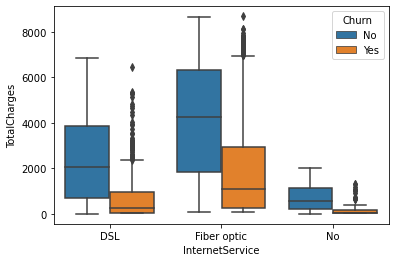

In [178]:
sns.boxplot(x=df['InternetService'],y=df['TotalCharges'],hue=df['Churn'])

In [179]:
df.groupby(["InternetService","Churn"])['TotalCharges'].median()

InternetService  Churn
DSL              No       2051.05
                 Yes       239.55
Fiber optic      No       4275.75
                 Yes      1111.65
No               No        587.10
                 Yes        21.00
Name: TotalCharges, dtype: float64

In [180]:
label_df=df.groupby(["InternetService","Churn"])['TotalCharges'].median().sort_values(ascending=False).index

In [181]:
val_df=df.groupby(["InternetService","Churn"])['TotalCharges'].median().sort_values(ascending=False).values

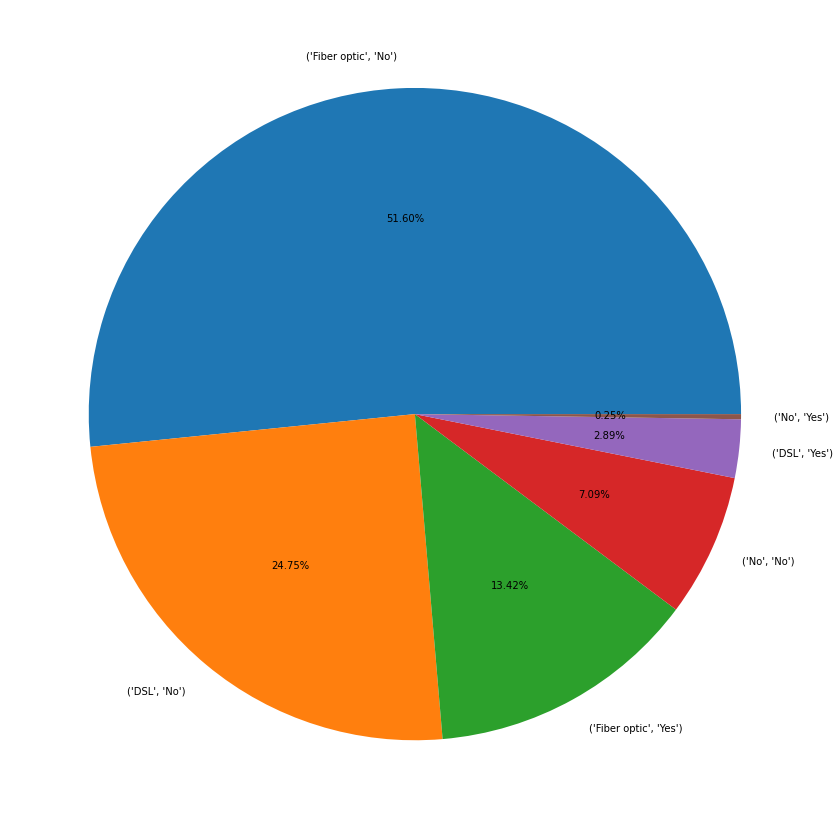

In [182]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have InternetService Fiber Optic and who do not churn has maximum total bill amount :4275.75 
2. Customers who have no InternetService and who do churn has minimum total bill amount :21

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

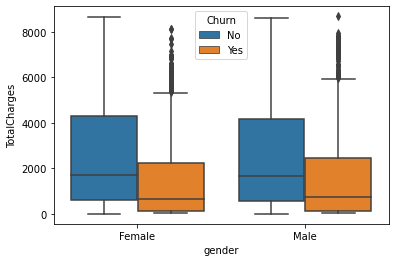

In [183]:
sns.boxplot(x=df['gender'],y=df['TotalCharges'],hue=df['Churn'])

In [184]:
df.groupby(["gender","Churn"])['TotalCharges'].median()

gender  Churn
Female  No       1710.15
        Yes       663.05
Male    No       1651.95
        Yes       740.15
Name: TotalCharges, dtype: float64

In [185]:
label_df=df.groupby(["gender","Churn"])['TotalCharges'].median().sort_values(ascending=False).index

In [186]:
val_df=df.groupby(["gender","Churn"])['TotalCharges'].median().sort_values(ascending=False).values

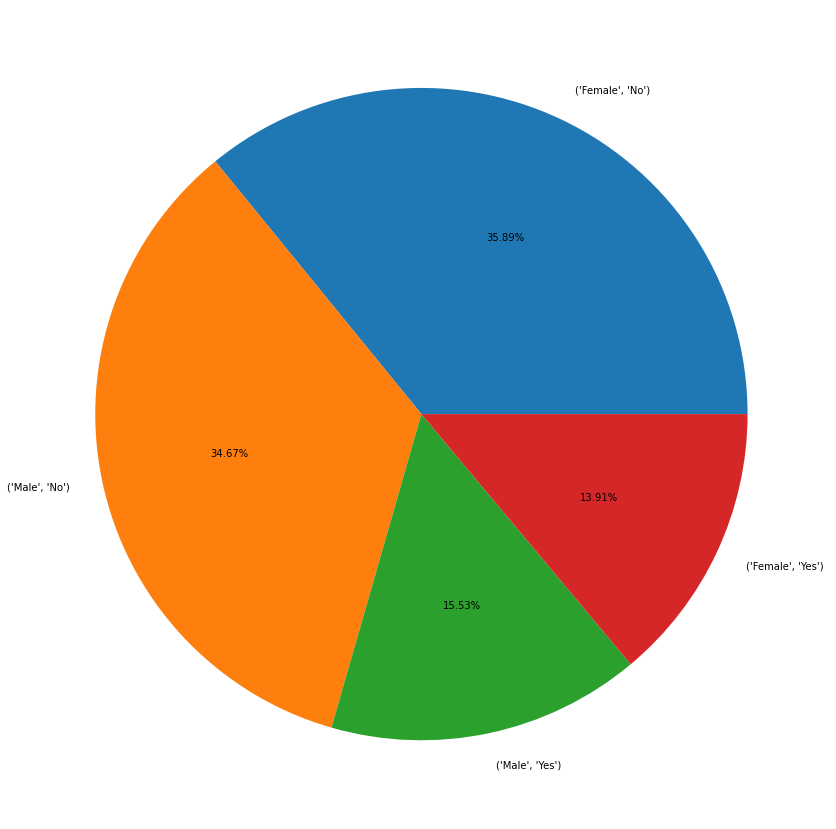

In [187]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers who do not churn has maximum total charges : 1710.15
2. Female Customers who churn has minimum total charges : 663.05


In [188]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [189]:
df['MonthlyCharges_Range']=pd.qcut(df['MonthlyCharges'],5)

In [190]:
df['TotalCharges_Range']=pd.qcut(df['TotalCharges'],5)

In [191]:
df['Tenure_Range']=pd.qcut(df['tenure'],5)

In [192]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Range,TotalCharges_Range,Tenure_Range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,"(25.05, 58.83]","(939.78, 2043.71]","(20.0, 40.0]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(25.05, 58.83]","(939.78, 2043.71]","(40.0, 60.0]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(58.83, 79.1]","(-0.001, 265.32]","(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(79.1, 94.25]","(939.78, 2043.71]","(20.0, 40.0]"
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(94.25, 118.75]","(4471.44, 8684.8]","(60.0, 72.0]"
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(25.05, 58.83]","(265.32, 939.78]","(6.0, 20.0]"
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(58.83, 79.1]","(265.32, 939.78]","(-0.001, 6.0]"


<AxesSubplot:xlabel='MonthlyCharges_Range', ylabel='count'>

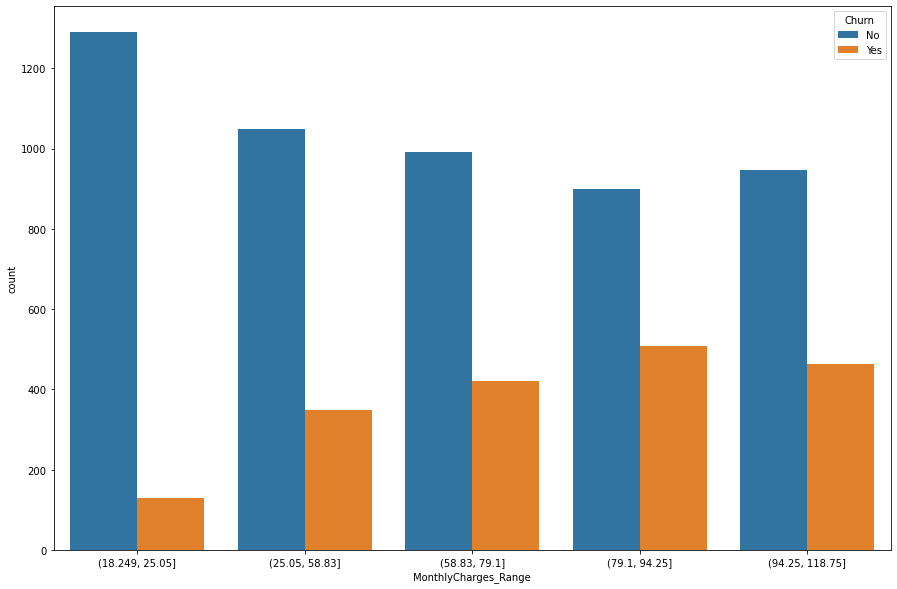

In [193]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['MonthlyCharges_Range'],hue=df['Churn'])

In [194]:
label_df=df.groupby(["MonthlyCharges_Range","Churn"]).size().sort_values(ascending=False).index

In [195]:
val_df=df.groupby(["MonthlyCharges_Range","Churn"]).size().sort_values(ascending=False).values

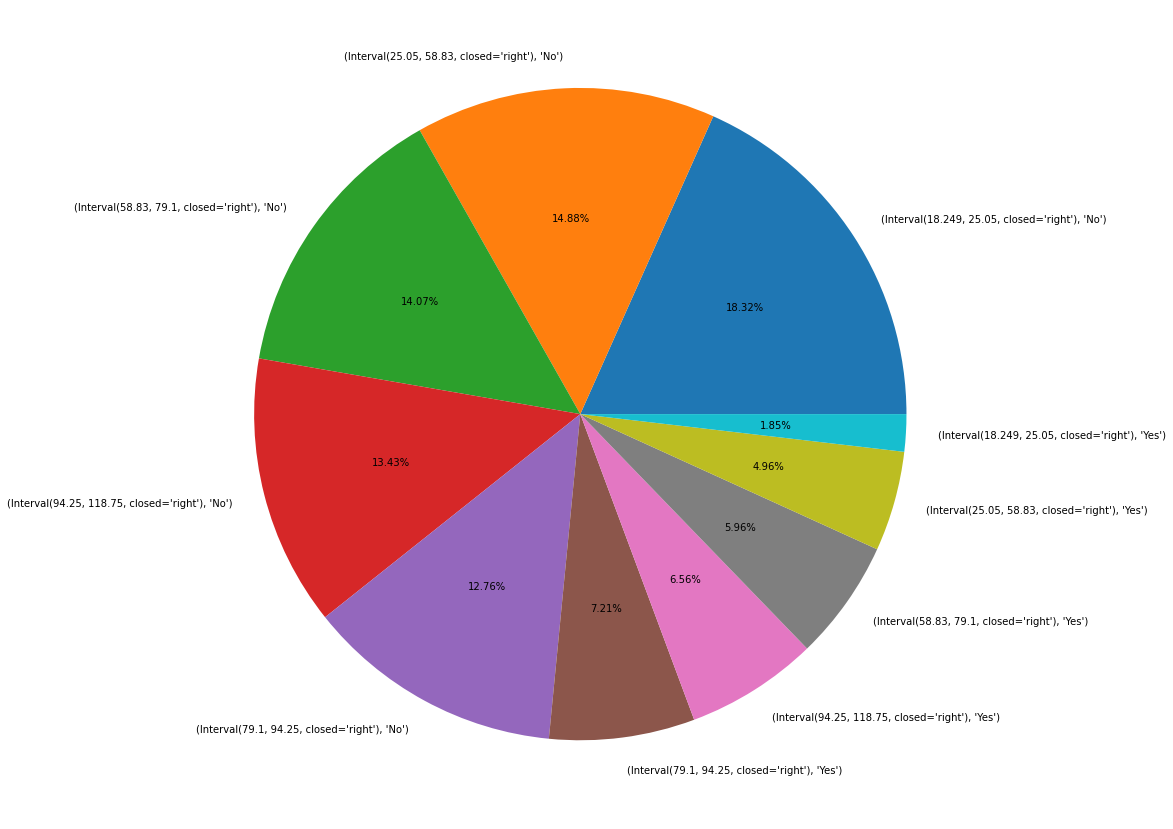

In [196]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers with Monthly Charges between 79.1 and 94.25 do maximum churn.
2. Customers with Monthly Charges between 18.249 and 25.05 do minimum churn.



<AxesSubplot:xlabel='TotalCharges_Range', ylabel='count'>

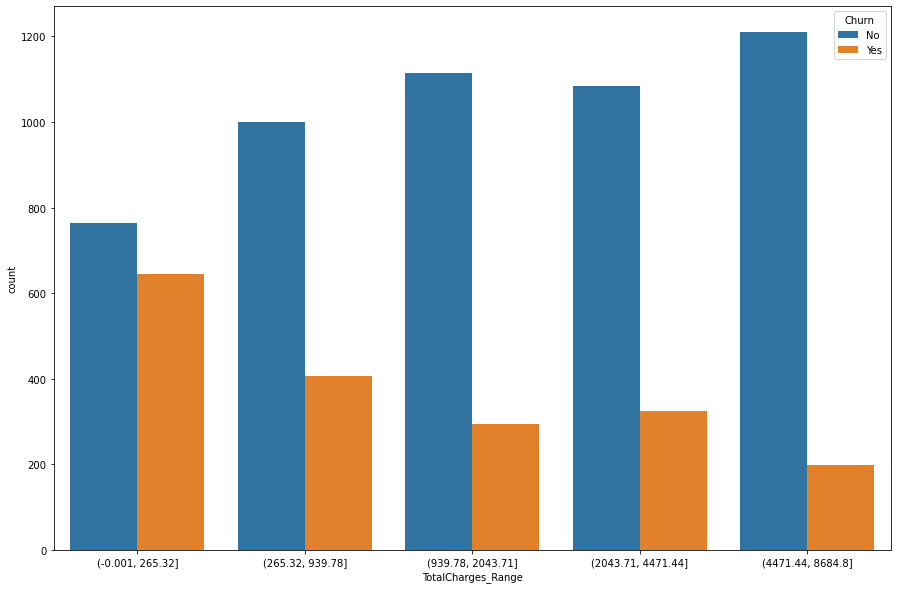

In [197]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['TotalCharges_Range'],hue=df['Churn'])

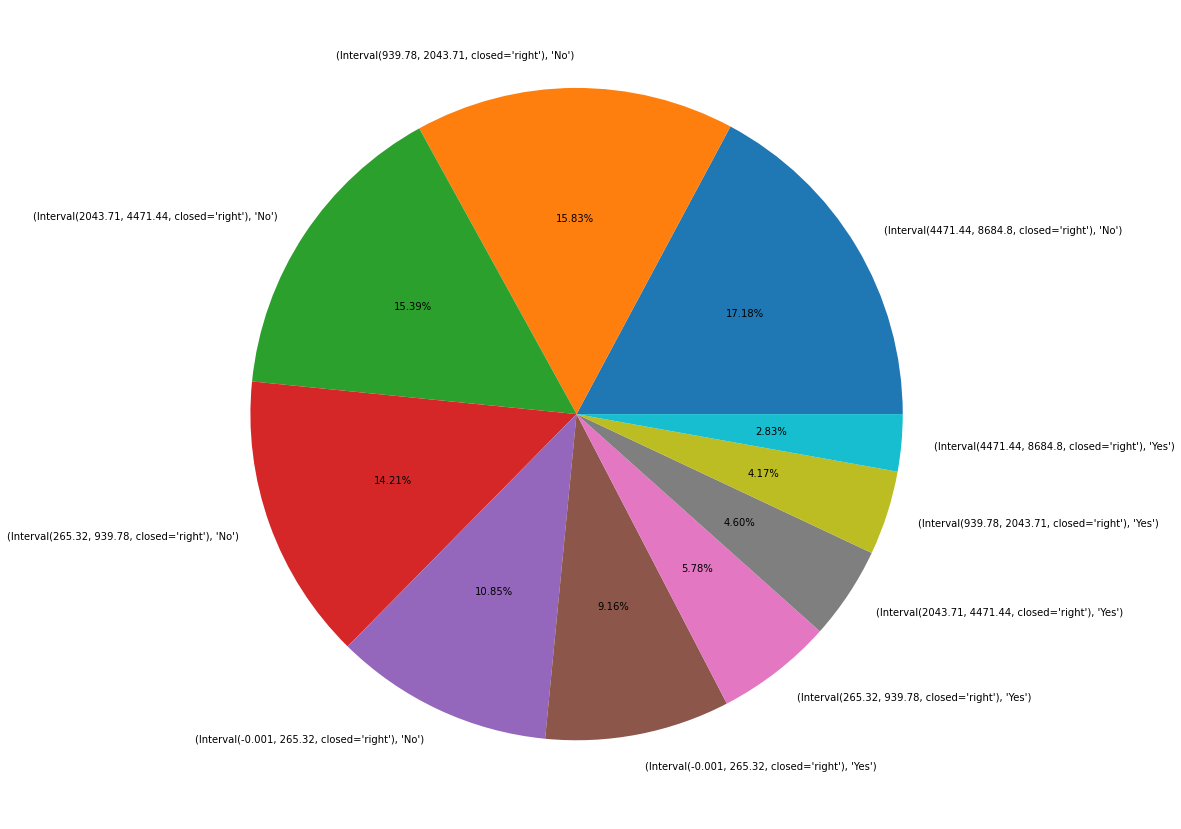

In [198]:
label_df=df.groupby(["TotalCharges_Range","Churn"]).size().sort_values(ascending=False).index

val_df=df.groupby(["TotalCharges_Range","Churn"]).size().sort_values(ascending=False).values

plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers with Total Charges between 0 and 265.32 churn maximum.
2. Customers with Total Charges between 4471.44 and 8684.8  churn minimum.



<AxesSubplot:xlabel='Tenure_Range', ylabel='count'>

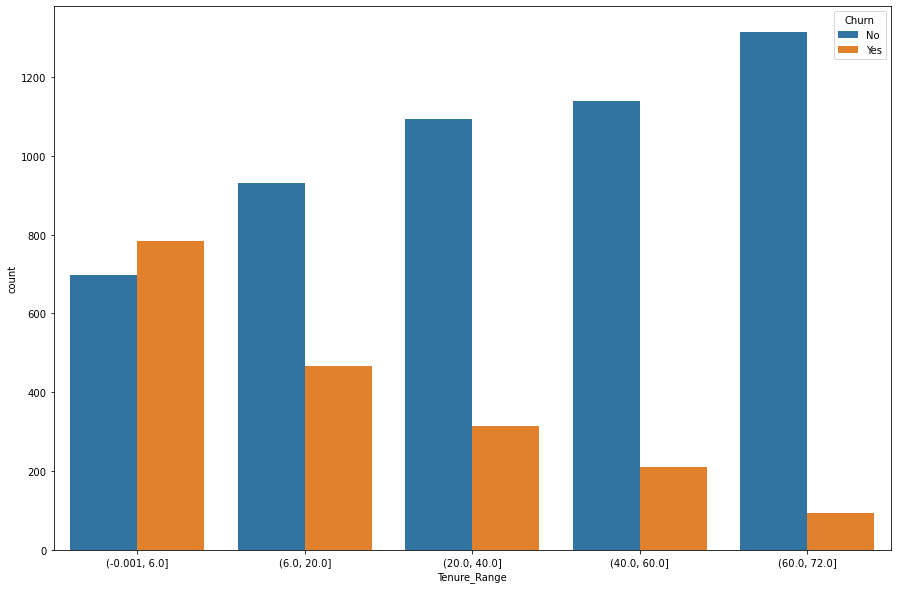

In [199]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Tenure_Range'],hue=df['Churn'])

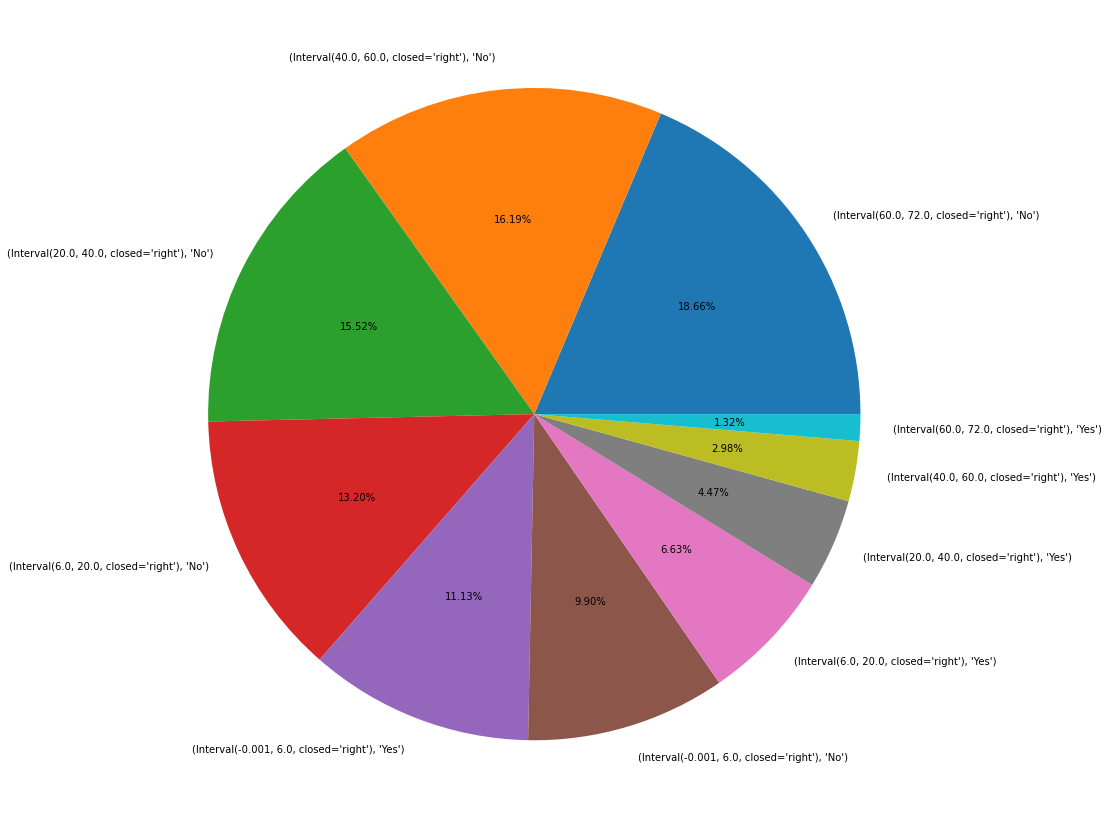

In [200]:
label_df=df.groupby(["Tenure_Range","Churn"]).size().sort_values(ascending=False).index

val_df=df.groupby(["Tenure_Range","Churn"]).size().sort_values(ascending=False).values

plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers between 0 to 6 months of tenure do maximum churn .
2. Customers between 60 to 72 months of tenure do minimum churn



In [201]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Range,TotalCharges_Range,Tenure_Range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,"(25.05, 58.83]","(939.78, 2043.71]","(20.0, 40.0]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(25.05, 58.83]","(939.78, 2043.71]","(40.0, 60.0]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(58.83, 79.1]","(-0.001, 265.32]","(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(79.1, 94.25]","(939.78, 2043.71]","(20.0, 40.0]"
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(94.25, 118.75]","(4471.44, 8684.8]","(60.0, 72.0]"
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(25.05, 58.83]","(265.32, 939.78]","(6.0, 20.0]"
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(58.83, 79.1]","(265.32, 939.78]","(-0.001, 6.0]"


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

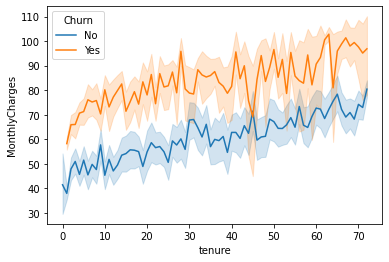

In [202]:
sns.lineplot(x=df['tenure'],y=df['MonthlyCharges'],hue=df['Churn'])

# Observations:
1. As the tenure increases Monthly charges also increases.
2. As the tenure increases Monthly charges of churn customer increases rapidly as compare to non-churn customers.
3. Monthly Charges for Churn customers are more as compared to non-churn customers.


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

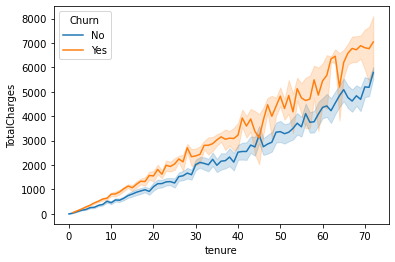

In [203]:
sns.lineplot(x=df['tenure'],y=df['TotalCharges'],hue=df['Churn'])

# Observations:
1. As the tenure increases Total charges also increases.
2. As the tenure increases Total charges of churn customer increases rapidly as compare to non-churn customers.
3. Total Charges for Churn customers are more as compared to non-churn customers.

In [204]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Range,TotalCharges_Range,Tenure_Range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,"(25.05, 58.83]","(939.78, 2043.71]","(20.0, 40.0]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(25.05, 58.83]","(939.78, 2043.71]","(40.0, 60.0]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(58.83, 79.1]","(-0.001, 265.32]","(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(79.1, 94.25]","(939.78, 2043.71]","(20.0, 40.0]"
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(94.25, 118.75]","(4471.44, 8684.8]","(60.0, 72.0]"
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(25.05, 58.83]","(265.32, 939.78]","(6.0, 20.0]"
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(58.83, 79.1]","(265.32, 939.78]","(-0.001, 6.0]"


In [205]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [206]:
df.to_excel("CleanData.xlsx")

In [207]:
le=LabelEncoder()

In [208]:
df['gender']=le.fit_transform(df['gender'])


In [209]:
df['Partner']=le.fit_transform(df['Partner'])


In [210]:
df['Dependents']=le.fit_transform(df['Dependents'])


In [211]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [212]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [213]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [214]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])

In [215]:
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [216]:
df['TechSupport']=le.fit_transform(df['TechSupport'])

In [217]:
df['StreamingTV']=le.fit_transform(df['StreamingTV'])

In [218]:
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

In [219]:
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])

In [220]:
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [221]:
df['Contract']=le.fit_transform(df['Contract'])

In [222]:
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

In [223]:
df['Churn']=le.fit_transform(df['Churn'])

In [224]:
df['Churn'].value_counts() #imbalanace dataset

0    5174
1    1869
Name: Churn, dtype: int64

In [225]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Range,TotalCharges_Range,Tenure_Range
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,1,2,29.85,29.85,0,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,1,0,3,56.95,1889.50,0,"(25.05, 58.83]","(939.78, 2043.71]","(20.0, 40.0]"
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,1,3,53.85,108.15,1,"(25.05, 58.83]","(-0.001, 265.32]","(-0.001, 6.0]"
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,0,1,0,0,42.30,1840.75,0,"(25.05, 58.83]","(939.78, 2043.71]","(40.0, 60.0]"
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,1,2,70.70,151.65,1,"(58.83, 79.1]","(-0.001, 265.32]","(-0.001, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,1,1,3,84.80,1990.50,0,"(79.1, 94.25]","(939.78, 2043.71]","(20.0, 40.0]"
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,1,1,1,103.20,7362.90,0,"(94.25, 118.75]","(4471.44, 8684.8]","(60.0, 72.0]"
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,1,2,29.60,346.45,0,"(25.05, 58.83]","(265.32, 939.78]","(6.0, 20.0]"
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,1,3,74.40,306.60,1,"(58.83, 79.1]","(265.32, 939.78]","(-0.001, 6.0]"


In [226]:
df.drop(['customerID','MonthlyCharges_Range','TotalCharges_Range','Tenure_Range','TotalCharges'],axis=1,inplace=True)

In [227]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [228]:
len(df.columns)


19

In [229]:
y=df['Churn']

In [230]:
X=df.drop('Churn',axis=1)

In [231]:
sc=StandardScaler()

In [232]:
X=sc.fit_transform(X)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [234]:
X_train.shape

(5634, 18)

In [235]:
import tensorflow as tf

In [236]:
from tensorflow import keras

In [237]:
model=keras.Sequential([
    keras.layers.Dense(30,input_shape=(18,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')    

]
)

In [238]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [240]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8021
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8072
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8067
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8090
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8078
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8124
Epoch 7/100
177/177 [==============================] - 0s 967us/step - loss: 0.4041 - accuracy: 0.8101
Epoch 8/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8127
Epoch 9/100
177/177 [==============================] - 0s 989us/step - loss: 0.4018 - accuracy: 0.8124
Epoch 10/100
177/177 [==============================] - 0s 930us/step - loss: 0.4010 - 

In [241]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 909us/step - loss: 0.4599 - accuracy: 0.7963


[0.45989808440208435, 0.7963094115257263]

In [243]:
y_pred=model.predict(X_test)

45/45 [==============================] - 0s 556us/step


In [244]:
y_pred #sigmoid function given value between o and 1 but we want 0 and 1

array([[0.7066963 ],
       [0.01415046],
       [0.00083865],
       ...,
       [0.03558448],
       [0.00278174],
       [0.6460421 ]], dtype=float32)

In [245]:
ypred=[]

for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)
        

In [248]:
ypred[:10]

[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [247]:
y_test[:10]

185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
Name: Churn, dtype: int32

In [251]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [253]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)

Text(33.0, 0.5, 'Truth')

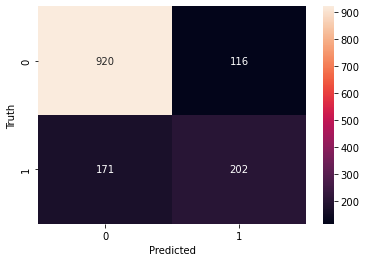

In [257]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [258]:
(920+202)/(920+116+202+171)

0.7963094393186657

# precision for customer who did not churn

In [259]:
(920)/(920+171)

0.843263061411549

# precision for customer who did churn

In [260]:
(202)/(116+202)

0.6352201257861635

# recall for customer who did not churn

In [261]:
(920)/(920+116)

0.888030888030888

# recall for customer who did churn

In [262]:
(202)/(202+171)

0.5415549597855228